<a href="https://colab.research.google.com/github/Aizuro/Streamlit/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Abdul Azizur Rokhman
- **Email:** azizrokhman88@gmail.com
- **ID Dicoding:** abdul_azizur_rokhman

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling laris dan bagaimana kontribusinya terhadap total pendapatan?
- Apakah kecepatan pengiriman berpengaruh terhadap skor review dari customer?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from shapely.geometry import Point, LineString

## Data Wrangling

### Gathering Data

Data Customer

In [ ]:
customer_fileid = "1ud7OTZCF4dcbB4TLk-8JC5KkJz3n8viC"
customer_url = f'https://drive.google.com/uc?export=download&id={customer_fileid}'

customer_df = pd.read_csv(customer_url)
customer_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

**Insight:**
- Terdapat kolom zip_code_prefix yang mana ini dapat digabungkan pada dataset Geolocation sehingga dapat mengetahui rata-rata kecepatan pengiriman dari lokasi customer
- Terdapat kolom city dan state, ini bisa dibuat untuk mengetahui banyaknya customer yang ada di kota/negara tersebut.

Data Geolocation

In [ ]:
geolocation_fileid = "1CWQg5RUwwdWUnD9Xnp3ZIzl2G_iimoc7"
geolocation_url = f'https://drive.google.com/uc?export=download&id={geolocation_fileid}'

geolocation_df = pd.read_csv(geolocation_url)
geolocation_df.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

**Insight:**
- Pada dataset ini, berisi data mengenai info setiap lokasi, ini bisa digabung dengan dataset Customer dan dataset Seller agar mengetahui lebih jelas letak customer berada sehingga dapat mengukur rata-rata kecepatan pengiriman pada lokasi seller ke lokasi customer

Data Order Items

In [ ]:
order_items_fileid = "1z7FDL1yzfrLkmQuwFvlV_zborjcIXeIx"
order_items_url = f'https://drive.google.com/uc?export=download&id={order_items_fileid}'

order_items_df = pd.read_csv(order_items_url)
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

**Insight:**
- Kolom order_id dan seller_id bisa digunakan untuk mengetahui seller mana yang memiliki penjualan terbanyak dan kolom harga untuk penghasilan terbanyak
- Kolom product_id bisa untuk mengetahui produk mana yang sering dibeli

Data Order Payment

In [ ]:
order_payment_fileid = "1TFYgB3e00TzeY1Pn_q1EGavXDY7CJCeh"
order_payment_url = f'https://drive.google.com/uc?export=download&id={order_payment_fileid}'

order_payment_df = pd.read_csv(order_payment_url)
order_payment_df.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

**Insight:**
- Pada dataset ini, kita bisa mengetahui tipe pembayaran apa yang sering digunakan untuk membayar pembelian

Data Order Reviews

In [ ]:
order_reviews_fileid = "1rE7JbK9LqI8JHwxgTpduv1kjcOXguQRj"
order_reviews_url = f'https://drive.google.com/uc?export=download&id={order_reviews_fileid}'

order_reviews_df = pd.read_csv(order_reviews_url)
order_reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

**Insight:**
- Pada kolom review_score, dapat digunakan untuk melihat rata-rata skor review yang diberikan pada setiap produk yang diorder

Data Orders

In [ ]:
orders_fileid = "1PTGtGaonHTGzUqcqqSfz4a-fbNHmbL9q"
orders_url = f'https://drive.google.com/uc?export=download&id={orders_fileid}'

orders_df = pd.read_csv(orders_url)
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

**Insight:**
- Pada dataset ini, rata-rata berisi kolom untuk jam pengiriman, jadi ini bisa dibuat untuk mengetahui kecepatan pengiriman dan kecepatan pengemasan

Data Product Category

In [ ]:
product_category_fileid = "14OshmOGJl0a-lVWQeGpPsjAsxKJ6w1Wv"
product_category_url = f'https://drive.google.com/uc?export=download&id={product_category_fileid}'

product_category_df = pd.read_csv(product_category_url)
product_category_df.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

**Insight:**
- tidak ada yang spesial dari dataset ini, hanya daftar kategori dari produk saja, mungkin bisa digabungkan dengan dataset produk agar saat divisualisasikan kita bisa mengetahui nama inggris dari kategori produk

Data Products

In [ ]:
products_fileid = "18PAmZYjQvzTK9keS6DLA1eriJhpDfk4v"
products_url = f'https://drive.google.com/uc?export=download&id={products_fileid}'

products_df = pd.read_csv(products_url)
products_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

**Insight:**
- Pada dataset ini tidak banyak yang spesial juga, hanya pada product_id ini yang bisa digabungkan dengan dataset order items untuk mengetahui produk apa saja yang sering dibeli, dan product_category_name yang bisa digabungkan dengan dataset product category untuk mengetahui nama inggrisnya

Data Sellers

In [ ]:
sellers_fileid = "1Sjcsw8fEnmOC69H4QjeJemUPBA6Hd-62"
sellers_url = f'https://drive.google.com/uc?export=download&id={sellers_fileid}'

sellers_df = pd.read_csv(sellers_url)
sellers_df.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

**Insight:**
- Pada kolom seller_id, ini bisa digunakan untuk mengetahui seller mana yang memiliki penjualan dan penghasilan terbanyak
- Pada kolom lokasi, ini bisa digunakan untuk mengetahui kecepatan pengiriman dari lokasi seller ke lokasi customer

### Assessing Data

Data Customer

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
customer_df['customer'] = range(1, len(customer_df) + 1)

customer = customer_df.pop('customer')
customer_df.insert(1, 'customer', customer)

In [ ]:
customer_df.head(5)

customer_id  customer  \
0  06b8999e2fba1a1fbc88172c00ba8bc7         1   
1  18955e83d337fd6b2def6b18a428ac77         2   
2  4e7b3e00288586ebd08712fdd0374a03         3   
3  b2b6027bc5c5109e529d4dc6358b12c3         4   
4  4f2d8ab171c80ec8364f7c12e35b23ad         5   

                 customer_unique_id  customer_zip_code_prefix  \
0  861eff4711a542e4b93843c6dd7febb0                     14409   
1  290c77bc529b7ac935b93aa66c333dc3                      9790   
2  060e732b5b29e8181a18229c7b0b2b5e                      1151   
3  259dac757896d24d7702b9acbbff3f3c                      8775   
4  345ecd01c38d18a9036ed96c73b8d066                     13056   

           customer_city customer_state  
0                 franca             SP  
1  sao bernardo do campo             SP  
2              sao paulo             SP  
3        mogi das cruzes             SP  
4               campinas             SP

**Insight:**
- Saya menambahkan kolom customer agar nanti pada visualisasi data, yang muncul adalah nomor dari customer, bukan customer_id nya, agar tidak terlalu panjang pada visualisasi
- selain itu, saya lihat tidak ada masalah apapun pada dataset ini

Data Geolocation

In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02

**Insight:**
- Pada data geolocation, terdapat banyak sekali data yang duplikat

Data Order Items

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

**Insight:**
- Terdapat masalah kesalahan tipe data pada kolom shipping_limit_date yang mana pada dataset ini bertipe object, tetapi seharusnya bertipe datetime

Data Order Payment

In [ ]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
print("Jumlah duplikasi: ", order_payment_df.duplicated().sum())
order_payment_df.describe()

Jumlah duplikasi:  0


payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

**Insight:**
- Pada kolom payment_value, nilai minimumnya adalah 0.00, sepertinya ini dikarenakan pembayaran yang tidak jadi

Data Order Reviews

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

**Insight:**
- Ada missing value pada kolom review_comment_title dan review_comment_message, tetapi mungkin ini tidak terlalu berpengaruh pada analisis nanti dikarenakan ini hanya komen yang diberikan pembeli pada produk yang dibeli, bukan skor review yang diberikan.

Data Orders

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 23:38:46   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

**Insight:**
- Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date yang seharusnya adalah datetime
- Terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Hal ini kemungkinan dikarenakan pesanan yang dilakukan, dibatalkan oleh pembeli

Data Product Category

In [ ]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Pada dataset ini aman, tidak ada masalah missing value, salah tipedata maupun duplikat data

Data Products

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

**Insight:**
- Ada masalah missing value pada deskripsi produknya, nanti coba saya lihat apakah ada yang melakukan pembelian pada produk tersebut atau tidak.
- Pada kolom product_weight_g, terdapat produk yang memiliki berat 0g

Data Sellers

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000

In [ ]:
sellers_df['seller'] = range(1, len(sellers_df) + 1)

seller = sellers_df.pop('seller')
sellers_df.insert(1, 'seller', seller)

**Insight:**
- Disini saya ingin menambahkan kolom baru yang digunakan agar nanti saat visualisasi bisa ditampilkan nomornya saja, karena jika yang ditampilkan id nya, itu akan panjang sekali
- Pada dataset ini tidak ada masalah sama sekali

### Cleaning Data

Data Geolocation

In [ ]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Data duplikat pada dataset Geolocation sudah berhasil diatasi dengan cara menghapus data duplikat tersebut, walau jumlahnya cukup banyak

Data Order Items

In [ ]:
for column in ['shipping_limit_date']:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Permasalahan tipe data pada dataset order items sudah berhasil ditangani dengan merubah tipe data object ke tipe data datetime

Data Order Payment

In [ ]:
order_payment_df[order_payment_df.payment_value == order_payment_df.payment_value.min()]

order_id  payment_sequential payment_type  \
19922   8bcbe01d44d147f901cd3192671144db                   4      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
43744   6ccb433e00daae1283ccc956189c82ae                   4      voucher   
51280   4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411   00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
62674   45ed6e85398a87c253db47c2d9f48216                   3      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
94427   c8c528189310eaa44a745b8d9d26908b                   1  not_defined   
100766  b23878b3e8eb4d25a158f57d96331b18                   4      voucher   

        payment_installments  payment_value  
19922                      1            0.0  
36822                      1            0.0  
43744                      1            0.0  
51280                      1            0.0  
57411                      1            0.0  
62674                      1            0.0  
77885                      1            0.0  
94427                      1            0.0  
100766                     1            0.0

In [ ]:
order_payment_df.drop(index=order_payment_df[order_payment_df['payment_value'] == 0.0].index, inplace=True)

**Insight:**
- Dikarenakan data payment_value 0.0 ini kemungkinan dikarenakan pembayaran yang tidak jadi dan hanya sedikit jumlahnya, jadi saya hapus saja untuk data yang memiliki payment_value 0.0
- Masalah data 0.0 sudah teratasi dengan menghapus data payment_value yang berisi 0.0 dikarenakan jumlahnya data yang sedikit

Data Orders

In [ ]:
orders_df[orders_df.order_approved_at.isna()]

order_id                       customer_id  \
1130   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
1868   df8282afe61008dc26c6c31011474d02  aa797b187b5466bc6925aaaa4bb3bed1   
2029   8d4c637f1accf7a88a4555f02741e606  b1dd715db389a2077f43174e7a675d07   
2161   7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
...                                 ...                               ...   
97696  5a00b4d35edffc56b825c3646a99ba9d  6a3bdf004ca96338fb5fad1b8d93c2e6   
98415  227c804e2a44760671a6a5697ea549e4  62e7477e75e542243ee62a0ba73f410f   
98909  e49e7ce1471b4693482d40c2bd3ad196  e4e7ab3f449aeb401f0216f86c2104db   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp order_approved_at  \
1130      canceled      2018-08-28 15:26:39               NaN   
1801      canceled      2018-09-20 13:54:16               NaN   
1868      canceled      2017-03-04 12:14:30               NaN   
2029      canceled      2018-08-29 16:27:49               NaN   
2161      canceled      2017-05-01 16:12:39               NaN   
...            ...                      ...               ...   
97696     canceled      2017-07-02 15:38:46               NaN   
98415     canceled      2017-09-28 15:02:56               NaN   
98909     canceled      2018-08-07 11:16:28               NaN   
99283     canceled      2018-08-31 16:13:44               NaN   
99347     canceled      2018-09-06 18:45:47               NaN   

      order_delivered_carrier_date order_delivered_customer_date  \
1130                           NaN                           NaN   
1801                           NaN                           NaN   
1868                           NaN                           NaN   
2029                           NaN                           NaN   
2161                           NaN                           NaN   
...                            ...                           ...   
97696                          NaN                           NaN   
98415                          NaN                           NaN   
98909                          NaN                           NaN   
99283                          NaN                           NaN   
99347                          NaN                           NaN   

      order_estimated_delivery_date  
1130            2018-09-12 00:00:00  
1801            2018-10-17 00:00:00  
1868            2017-04-10 00:00:00  
2029            2018-09-13 00:00:00  
2161            2017-05-30 00:00:00  
...                             ...  
97696           2017-07-25 00:00:00  
98415           2017-10-16 00:00:00  
98909           2018-08-10 00:00:00  
99283           2018-10-01 00:00:00  
99347           2018-09-27 00:00:00  

[160 rows x 8 columns]

In [ ]:
orders_df[orders_df.order_delivered_carrier_date.isna()]
# Terdapat 2 data yang status ordernya sudah invoiced, tetapi order deliver date nya NaN

order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
266    8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
324    d3c8851a6651eeff2f73b0e011ac45d0  957f8e082185574de25992dc659ebbc0   
...                                 ...                               ...   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp    order_approved_at  \
6         invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
103       invoiced      2018-08-03 17:44:42  2018-08-07 06:15:14   
128     processing      2017-09-03 14:22:03  2017-09-03 14:30:09   
266    unavailable      2017-11-16 15:09:28  2017-11-16 15:26:57   
324     processing      2016-10-05 22:44:13  2016-10-06 15:51:05   
...            ...                      ...                  ...   
99283     canceled      2018-08-31 16:13:44                  NaN   
99313   processing      2018-01-05 23:07:24  2018-01-09 07:18:05   
99347     canceled      2018-09-06 18:45:47                  NaN   
99348  unavailable      2017-08-23 16:28:04  2017-08-28 15:44:47   
99415  unavailable      2017-10-10 10:50:03  2017-10-14 18:35:57   

      order_delivered_carrier_date order_delivered_customer_date  \
6                              NaN                           NaN   
103                            NaN                           NaN   
128                            NaN                           NaN   
266                            NaN                           NaN   
324                            NaN                           NaN   
...                            ...                           ...   
99283                          NaN                           NaN   
99313                          NaN                           NaN   
99347                          NaN                           NaN   
99348                          NaN                           NaN   
99415                          NaN                           NaN   

      order_estimated_delivery_date  
6               2017-05-09 00:00:00  
103             2018-08-21 00:00:00  
128             2017-10-03 00:00:00  
266             2017-12-05 00:00:00  
324             2016-12-09 00:00:00  
...                             ...  
99283           2018-10-01 00:00:00  
99313           2018-02-06 00:00:00  
99347           2018-09-27 00:00:00  
99348           2017-09-15 00:00:00  
99415           2017-10-23 00:00:00  

[1783 rows x 8 columns]

In [ ]:
orders_df[orders_df.order_delivered_customer_date.isna()]
# Terdapat 4 Data juga disini

order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44     ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
154    6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
...                                 ...                               ...   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp    order_approved_at  \
6         invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
44         shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
103       invoiced      2018-08-03 17:44:42  2018-08-07 06:15:14   
128     processing      2017-09-03 14:22:03  2017-09-03 14:30:09   
154        shipped      2018-01-10 11:33:07  2018-01-11 02:32:30   
...            ...                      ...                  ...   
99283     canceled      2018-08-31 16:13:44                  NaN   
99313   processing      2018-01-05 23:07:24  2018-01-09 07:18:05   
99347     canceled      2018-09-06 18:45:47                  NaN   
99348  unavailable      2017-08-23 16:28:04  2017-08-28 15:44:47   
99415  unavailable      2017-10-10 10:50:03  2017-10-14 18:35:57   

      order_delivered_carrier_date order_delivered_customer_date  \
6                              NaN                           NaN   
44             2018-06-05 14:32:00                           NaN   
103                            NaN                           NaN   
128                            NaN                           NaN   
154            2018-01-11 19:39:23                           NaN   
...                            ...                           ...   
99283                          NaN                           NaN   
99313                          NaN                           NaN   
99347                          NaN                           NaN   
99348                          NaN                           NaN   
99415                          NaN                           NaN   

      order_estimated_delivery_date  
6               2017-05-09 00:00:00  
44              2018-06-28 00:00:00  
103             2018-08-21 00:00:00  
128             2017-10-03 00:00:00  
154             2018-02-07 00:00:00  
...                             ...  
99283           2018-10-01 00:00:00  
99313           2018-02-06 00:00:00  
99347           2018-09-27 00:00:00  
99348           2017-09-15 00:00:00  
99415           2017-10-23 00:00:00  

[2965 rows x 8 columns]

In [ ]:
orders_df.dropna(axis=0, inplace=True)

In [ ]:
for column in ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


**Insight:**
- Permasalahan kesalahan tipe data sudah berhasil diatasi dengan mengubah tipe data object ke datetime
- Setelah saya analisa, sepertinya data-data missing value ini rata-rata adalah data pemesanan yang dibatalkan. Permasalahan missing value pada dataset orders berhasil diatasi dengan cara menghapus seluruh data missing value dikarenakan rata-rata data dari missing value ini tidak terlalu memiliki informasi penting untuk analisis nanti

Data Products

In [ ]:
products_df[products_df.product_category_name.isna()]

product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN                 NaN   
145                    NaN                         NaN                 NaN   
154                    NaN                         NaN                 NaN   
197                    NaN                         NaN                 NaN   
...                    ...                         ...                 ...   
32515                  NaN                         NaN                 NaN   
32589                  NaN                         NaN                 NaN   
32616                  NaN                         NaN                 NaN   
32772                  NaN                         NaN                 NaN   
32852                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
105               650.0               17.0               14.0   
128               300.0               16.0                7.0   
145               200.0               20.0               20.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
...                 ...                ...                ...   
32515            1800.0               30.0               20.0   
32589             800.0               30.0               10.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm  
105                12.0  
128                20.0  
145                20.0  
154                41.0  
197                12.0  
...                 ...  
32515              70.0  
32589              23.0  
32616              16.0  
32772              45.0  
32852              43.0  

[610 rows x 9 columns]

In [ ]:
# saya coba untuk cek di data order item, apakah ada atau tidak data tersebut

order_items_df[order_items_df.product_id == 'a41e356c76fab66334f36de622ecbd3a']

order_id  order_item_id  \
81289  b8bfa12431142333a0c84802f9529d87              2   

                             product_id                         seller_id  \
81289  a41e356c76fab66334f36de622ecbd3a  d9cb0052a666de5308b32f32ad5f1b1c   

      shipping_limit_date  price  freight_value  
81289 2018-01-25 09:08:37   99.3           7.77

In [ ]:
products_df['product_category_name'].fillna(value='empty', inplace=True)

<ipython-input-47-636633da0621>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(value='empty', inplace=True)


In [ ]:
products_df.fillna(value=0, inplace=True)

In [ ]:
products_df[products_df.product_category_name == 'empty']

product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                 empty   
128    d8dee61c2034d6d075997acef1870e9b                 empty   
145    56139431d72cd51f19eb9f7dae4d1617                 empty   
154    46b48281eb6d663ced748f324108c733                 empty   
197    5fb61f482620cb672f5e586bb132eae9                 empty   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                 empty   
32589  10dbe0fbaa2c505123c17fdc34a63c56                 empty   
32616  bd2ada37b58ae94cc838b9c0569fecd8                 empty   
32772  fa51e914046aab32764c41356b9d4ea4                 empty   
32852  c4ceee876c82b8328e9c293fa0e1989b                 empty   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    0.0                         0.0                 0.0   
128                    0.0                         0.0                 0.0   
145                    0.0                         0.0                 0.0   
154                    0.0                         0.0                 0.0   
197                    0.0                         0.0                 0.0   
...                    ...                         ...                 ...   
32515                  0.0                         0.0                 0.0   
32589                  0.0                         0.0                 0.0   
32616                  0.0                         0.0                 0.0   
32772                  0.0                         0.0                 0.0   
32852                  0.0                         0.0                 0.0   

       product_weight_g  product_length_cm  product_height_cm  \
105               650.0               17.0               14.0   
128               300.0               16.0                7.0   
145               200.0               20.0               20.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
...                 ...                ...                ...   
32515            1800.0               30.0               20.0   
32589             800.0               30.0               10.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm  
105                12.0  
128                20.0  
145                20.0  
154                41.0  
197                12.0  
...                 ...  
32515              70.0  
32589              23.0  
32616              16.0  
32772              45.0  
32852              43.0  

[610 rows x 9 columns]

**Insight:**
- Dikarenakan pada data missing value terdapat order yang dilakukan, maka saya mengubah untuk isi dari product_category_name menjadi "empty", dan untuk product_name_lenght, product_description_lenght, dan product_photos_qty menjadi 0
- Masalah missing value pada data products sudah berhasil diatasi dengan cara mengubah isi dari product_category_name menjadi "empty", dan untuk product_name_lenght, product_description_lenght, dan product_photos_qty menjadi 0 dikarenakan data missing value tersebut sudah ada pengorderan yang dilakukan, jadi agak sayang jika di hapus

## Exploratory Data Analysis (EDA)

### Explore Data Customer

In [ ]:
customer_df.describe(include="all")

customer_id      customer  \
count                              99441  99441.000000   
unique                             99441           NaN   
top     06b8999e2fba1a1fbc88172c00ba8bc7           NaN   
freq                                   1           NaN   
mean                                 NaN  49721.000000   
std                                  NaN  28706.288396   
min                                  NaN      1.000000   
25%                                  NaN  24861.000000   
50%                                  NaN  49721.000000   
75%                                  NaN  74581.000000   
max                                  NaN  99441.000000   

                      customer_unique_id  customer_zip_code_prefix  \
count                              99441              99441.000000   
unique                             96096                       NaN   
top     8d50f5eadf50201ccdcedfb9e2ac8455                       NaN   
freq                                  17                       NaN   
mean                                 NaN              35137.474583   
std                                  NaN              29797.938996   
min                                  NaN               1003.000000   
25%                                  NaN              11347.000000   
50%                                  NaN              24416.000000   
75%                                  NaN              58900.000000   
max                                  NaN              99990.000000   

       customer_city customer_state  
count          99441          99441  
unique          4119             27  
top        sao paulo             SP  
freq           15540          41746  
mean             NaN            NaN  
std              NaN            NaN  
min              NaN            NaN  
25%              NaN            NaN  
50%              NaN            NaN  
75%              NaN            NaN  
max              NaN            NaN

In [ ]:
# saya ingin mengecek jumlah customer pada setiap kota dan kota mana yang memiliki customer terbanyak
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [ ]:
# saya coba cek juga untuk yang state
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight:**
- Kota yang memiliki customer terbanyak adalah kota sao paulo dan negara yang memiliki customer terbanyak adalah negara SP

### Explore Data Geolocation

In [ ]:
geolocation_df.describe(include="all")

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                 738332.000000    738332.000000    738332.000000   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   38316.086800       -20.998353       -46.461098   
std                    30632.496675         5.892315         4.393705   
min                     1001.000000       -36.605374      -101.466766   
25%                    12600.000000       -23.603061       -48.867822   
50%                    29144.000000       -22.873588       -46.647278   
75%                    65950.000000       -19.923336       -43.836974   
max                    99990.000000        45.065933       121.105394   

       geolocation_city geolocation_state  
count            738332            738332  
unique             8011                27  
top           sao paulo                SP  
freq              79927            285976  
mean                NaN               NaN  
std                 NaN               NaN  
min                 NaN               NaN  
25%                 NaN               NaN  
50%                 NaN               NaN  
75%                 NaN               NaN  
max                 NaN               NaN

In [ ]:
sellers_loc_df = sellers_df.merge(geolocation_df.rename(columns={'geolocation_zip_code_prefix': 'seller_zip_code_prefix',
                                     'geolocation_lat': 'seller_lat',
                                     'geolocation_lng': 'seller_lng'}),
              on='seller_zip_code_prefix', how='left')

sellers_loc_df = (
    sellers_loc_df.groupby('seller_id', as_index=False)
    .agg(
        lat=('seller_lat', 'mean'),
        lon=('seller_lng', 'mean'),
        zip_code_prefix=('seller_zip_code_prefix', 'first'),  # Contoh kolom tambahan
        seller=('seller', 'first'),
        seller_city=('seller_city', 'first')
    )
)

sellers_loc_df = (
    sellers_loc_df.groupby('seller_city', as_index=False)
    .agg(
        seller_id=('seller_id', 'first'),
        lat=('lat', 'mean'),
        lon=('lon', 'mean'),
        zip_code_prefix=('zip_code_prefix', 'first'),  # Contoh kolom tambahan
        seller=('seller', 'first')
    )
)

sellers_loc_df.head()

seller_city                         seller_id        lat        lon  \
0         04482255  ceb7b4fb9401cd378de7886317ad1b47 -23.013945 -43.463020   
1  abadia de goias  c8143b3069f6746a77421b5ce30a450c -16.767161 -49.438178   
2   afonso claudio  2f4b9d112bfa44a214bc6cef085d17c8 -20.076743 -41.123686   
3  aguas claras df  3a52d63a8f9daf5a28f3626d7eb9bd28 -15.832887 -48.029378   
4         alambari  717b78b0950b51ed00b1471d858b0edc -23.561571 -47.885101   

   zip_code_prefix  seller  
0            22790     518  
1            75345    2068  
2            29600    2154  
3            71900    2590  
4            18220    2116

In [ ]:
customer_loc_df = customer_df.merge(geolocation_df.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix',
                                     'geolocation_lat': 'customer_lat',
                                     'geolocation_lng': 'customer_lng'}),
              on='customer_zip_code_prefix', how='left')

customer_loc_df = (
    customer_loc_df.groupby('customer_id', as_index=False)
    .agg(
        lat=('customer_lat', 'mean'),
        lon=('customer_lng', 'mean'),
        zip_code_prefix=('customer_zip_code_prefix', 'first'),  # Contoh kolom tambahan
        customer=('customer', 'first'),
        customer_city=('customer_city', 'first')
    )
)

customer_loc_df = (
    customer_loc_df.groupby('customer_city', as_index=False)
    .agg(
        customer_id=('customer_id', 'first'),
        lat=('lat', 'mean'),
        lon=('lon', 'mean'),
        zip_code_prefix=('zip_code_prefix', 'first'),  # Contoh kolom tambahan
        customer=('customer', 'first')
    )
)

customer_loc_df.head()

customer_city                       customer_id        lat  \
0  abadia dos dourados  9e01f714a2b3b8962c222cf2b74c20dc -18.477752   
1            abadiania  576d71ddb21b21763cfedce73b902180 -16.193718   
2               abaete  08528824266cd0720658ff01df662b6a -19.158364   
3           abaetetuba  305f736d2711641a06f6a9c9bd837b00  -1.723644   
4              abaiara  9723d86b12bdec025be4c43f71b0ba52  -7.355970   

         lon  zip_code_prefix  customer  
0 -47.406319            38540     74530  
1 -48.709452            72940     42308  
2 -45.446897            35620     61141  
3 -48.881349            68440     11201  
4 -39.043267            63240     69826

**Insight:**
- Pada data geolocation, saya gabungkan dengan data customer dan seller untuk pembuatan analisis geospatial nanti dengan menyamakan zip codenya lalu mengambil rata-rata dari lat dan lng nya agar tidak ada duplikasi pada customer/seller, lalu saya mengambil rata-rata lagi dari kota seller/customer agar tidak banyak poin-poin pada kota yang sama sehingga visualisasi map akan lebih ringan

### Explore Data Order Items

In [ ]:
order_items_df.describe(include="all")

order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   
std                                  NaN       0.705124   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e68314663af  6560211a19b47992c3666cc44a7e94c0   
freq                                 527                              2033   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

                  shipping_limit_date          price  freight_value  
count                          112650  112650.000000  112650.000000  
unique                            NaN            NaN            NaN  
top                               NaN            NaN            NaN  
freq                              NaN            NaN            NaN  
mean    2018-01-07 15:36:52.192685312     120.653739      19.990320  
min               2016-09-19 00:15:34       0.850000       0.000000  
25%        2017-09-20 20:57:27.500000      39.900000      13.080000  
50%               2018-01-26 13:59:35      74.990000      16.260000  
75%     2018-05-10 14:34:00.750000128     134.900000      21.150000  
max               2020-04-09 22:35:08    6735.000000     409.680000  
std                               NaN     183.633928      15.806405

In [ ]:
order_items_df = order_items_df.merge(
    products_df[['product_id', 'product_category_name']],
    on="product_id",
    how="left"
)

order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value product_category_name  
0 2017-09-19 09:45:35   58.90          13.29            cool_stuff  
1 2017-05-03 11:05:13  239.90          19.93              pet_shop  
2 2018-01-18 14:48:30  199.00          17.87      moveis_decoracao  
3 2018-08-15 10:10:18   12.99          12.79            perfumaria  
4 2017-02-13 13:57:51  199.90          18.14    ferramentas_jardim

In [ ]:
order_items_df = order_items_df.merge(
    sellers_df[['seller_id', 'seller']],
    on="seller_id",
    how="left"
)

order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value product_category_name  seller  
0 2017-09-19 09:45:35   58.90          13.29            cool_stuff     514  
1 2017-05-03 11:05:13  239.90          19.93              pet_shop     472  
2 2018-01-18 14:48:30  199.00          17.87      moveis_decoracao    1825  
3 2018-08-15 10:10:18   12.99          12.79            perfumaria    2024  
4 2017-02-13 13:57:51  199.90          18.14    ferramentas_jardim    1598

In [ ]:
order_items_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 74, dtype: int64

In [ ]:
order_items_df.groupby(by="product_category_name").price.max().sort_values(ascending=False)

product_category_name
utilidades_domesticas            6735.00
pcs                              6729.00
artes                            6499.00
eletroportateis                  4799.00
instrumentos_musicais            4399.87
                                  ...   
seguros_e_servicos                183.29
fraldas_higiene                   139.89
fashion_roupa_infanto_juvenil     110.00
flores                             65.90
cds_dvds_musicais                  65.00
Name: price, Length: 74, dtype: float64

In [ ]:
order_items_df.groupby(by="seller").order_id.nunique().sort_values(ascending=False)

seller
798     1854
2464    1806
1414    1706
475     1404
1874    1314
        ... 
1774       1
1775       1
1781       1
1785       1
3095       1
Name: order_id, Length: 3095, dtype: int64

In [ ]:
order_items_df.groupby(by="seller").price.sum().sort_values(ascending=False)

seller
2618    229472.63
902     222776.05
2464    200472.92
558     194042.03
1183    187923.89
          ...    
138          8.00
2415         7.60
2099         6.90
2334         6.50
2212         3.50
Name: price, Length: 3095, dtype: float64

**Insight:**
- Disini bisa mendapatkan cukup banyak informasi dengan menggabungkan kolom dari data product dan kolom dari data seller ke data order_items, disini untuk kategori produk yang memiliki penjualan paling banyak adalah cama mesa banho, dan untuk produk yang memiliki harga tertinggi adalah utilidades domesticas
- Lalu untuk penjual yang memiliki penjualan terbanyak ada pada penjual ke 798, dan penjual yang memiliki revenue tertinggi ada pada penjual ke 2618

### Explore Data Order Payment

In [ ]:
order_payment_df.describe(include="all")

order_id  payment_sequential payment_type  \
count                             103877       103877.000000       103877   
unique                             99437                 NaN            4   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  27                 NaN        76795   
mean                                 NaN            1.092340          NaN   
std                                  NaN            0.704312          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count          103877.000000  103877.000000  
unique                   NaN            NaN  
top                      NaN            NaN  
freq                     NaN            NaN  
mean                2.853509     154.113732  
std                 2.687112     217.498755  
min                 0.000000       0.010000  
25%                 1.000000      56.820000  
50%                 1.000000     100.000000  
75%                 4.000000     171.840000  
max                24.000000   13664.080000

In [ ]:
order_payment_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
Name: order_id, dtype: int64

In [ ]:
order_payment_df.groupby(by="payment_installments").order_id.nunique().sort_values(ascending=False)

payment_installments
1     49057
2     12389
3     10443
4      7088
10     5315
5      5234
8      4253
6      3916
7      1623
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: order_id, dtype: int64

**Insight:**
- Pembayaran terbanyak adalah 13664.080000, dan untuk tipe pembayaran terbanyak adalah menggunakan credit card
- Lalu untuk cicilan/payment_installments, ternyata banyak yang membayar pembelian dengan sekali bayar

### Explore Data Order Reviews

In [ ]:
order_reviews_df.describe(include="all")

review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     7b606b0d57b078384f0b58eac1d41d78  c88b1d1b157a9999ce368f218a407141   
freq                                   3                                 3   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        review_score review_comment_title review_comment_message  \
count   99224.000000                11568                  40977   
unique           NaN                 4527                  36159   
top              NaN            Recomendo              Muito bom   
freq             NaN                  423                    230   
mean        4.086421                  NaN                    NaN   
std         1.347579                  NaN                    NaN   
min         1.000000                  NaN                    NaN   
25%         4.000000                  NaN                    NaN   
50%         5.000000                  NaN                    NaN   
75%         5.000000                  NaN                    NaN   
max         5.000000                  NaN                    NaN   

       review_creation_date review_answer_timestamp  
count                 99224                   99224  
unique                  636                   98248  
top     2017-12-19 00:00:00     2017-06-15 23:21:05  
freq                    463                       4  
mean                    NaN                     NaN  
std                     NaN                     NaN  
min                     NaN                     NaN  
25%                     NaN                     NaN  
50%                     NaN                     NaN  
75%                     NaN                     NaN  
max                     NaN                     NaN

In [ ]:
order_reviews_df = order_reviews_df.merge(
    order_items_df[['order_id', 'product_id', 'product_category_name']],
    on="order_id",
    how="left"
)

order_reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
2  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
3  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
4  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   

   review_score review_comment_title                 review_comment_message  \
0             4                  NaN                                    NaN   
1             4                  NaN                                    NaN   
2             5                  NaN                                    NaN   
3             5                  NaN                                    NaN   
4             5                  NaN  Recebi bem antes do prazo estipulado.   

  review_creation_date review_answer_timestamp  \
0  2018-01-18 00:00:00     2018-01-18 21:46:59   
1  2018-01-18 00:00:00     2018-01-18 21:46:59   
2  2018-03-10 00:00:00     2018-03-11 03:05:13   
3  2018-02-17 00:00:00     2018-02-18 14:36:24   
4  2017-04-21 00:00:00     2017-04-21 22:02:06   

                         product_id   product_category_name  
0  fd25ab760bfbba13c198fa3b4f1a0cd3           esporte_lazer  
1  fd25ab760bfbba13c198fa3b4f1a0cd3           esporte_lazer  
2  be0dbdc3d67d55727a65d4cd696ca73c  informatica_acessorios  
3  d1c427060a0f73f6b889a5c7c61f2ac4  informatica_acessorios  
4  52c80cedd4e90108bf4fa6a206ef6b03      ferramentas_jardim

In [ ]:
review_stats = order_reviews_df.groupby("product_category_name").agg(
    average_score=('review_score', 'mean'),
    total_reviews=('review_score', 'count')
).sort_values(by="average_score", ascending=False)

print(review_stats)

                                               average_score  total_reviews
product_category_name                                                      
cds_dvds_musicais                                   4.642857             14
fashion_roupa_infanto_juvenil                       4.500000              8
livros_interesse_geral                              4.446266            549
construcao_ferramentas_ferramentas                  4.444444             99
flores                                              4.419355             31
...                                                      ...            ...
moveis_escritorio                                   3.493183           1687
pc_gamer                                            3.333333              9
portateis_cozinha_e_preparadores_de_alimentos       3.266667             15
fraldas_higiene                                     3.256410             39
seguros_e_servicos                                  2.500000              2

[74 rows x 

In [ ]:
review_stats = order_reviews_df.groupby("product_category_name").agg(
    average_score=('review_score', 'mean'),
    total_reviews=('review_score', 'count')
).sort_values(by="total_reviews", ascending=False)

print(review_stats)

                               average_score  total_reviews
product_category_name                                      
cama_mesa_banho                     3.895663          11137
beleza_saude                        4.142768           9645
esporte_lazer                       4.107986           8640
moveis_decoracao                    3.903493           8331
informatica_acessorios              3.930819           7849
...                                      ...            ...
cds_dvds_musicais                   4.642857             14
la_cuisine                          4.000000             13
pc_gamer                            3.333333              9
fashion_roupa_infanto_juvenil       4.500000              8
seguros_e_servicos                  2.500000              2

[74 rows x 2 columns]


**Insight:**
- Disini bisa mendapatkan informasi mengenai skor review setiap produk, produk yang memiliki skor review tertinggi adalah cds dvd musicais tetapi memiliki total review yang sedikit yaitu 14 saja, untuk produk yang memiliki review terbanyak adalah cama mesa banho tetapi memiliki skor review yang tengah-tengah yaitu 3.9, mungkin dari penglihatan saya produk yang memiliki skor review tertinggi serta total review terbanyak adalah produk beleza saude dengan skor review 4.1 dengan total review 9645

### Explore Data Orders

In [ ]:
orders_df.describe(include="all")

order_id                       customer_id  \
count                              96461                             96461   
unique                             96461                             96461   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       order_status       order_purchase_timestamp  \
count         96461                          96461   
unique            2                            NaN   
top       delivered                            NaN   
freq          96455                            NaN   
mean            NaN  2018-01-01 23:53:26.642249216   
min             NaN            2016-09-15 12:16:38   
25%             NaN            2017-09-14 09:28:28   
50%             NaN            2018-01-20 19:59:42   
75%             NaN            2018-05-05 18:33:24   
max             NaN            2018-08-29 15:00:37   

                    order_approved_at   order_delivered_carrier_date  \
count                           96461                          96461   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2018-01-02 10:10:06.480142336  2018-01-05 05:21:04.508827392   
min               2016-09-15 12:16:38            2016-10-08 10:34:01   
25%               2017-09-14 14:30:14            2017-09-18 16:52:19   
50%               2018-01-22 13:49:00            2018-01-24 16:19:03   
75%               2018-05-06 10:30:49            2018-05-08 14:33:00   
max               2018-08-29 15:10:26            2018-09-11 19:48:28   

        order_delivered_customer_date  order_estimated_delivery_date  
count                           96461                          96461  
unique                            NaN                            NaN  
top                               NaN                            NaN  
freq                              NaN                            NaN  
mean    2018-01-14 13:17:13.228102400  2018-01-25 17:33:14.236012544  
min               2016-10-11 13:46:32            2016-10-04 00:00:00  
25%               2017-09-25 22:31:59            2017-10-05 00:00:00  
50%               2018-02-02 19:50:56            2018-02-16 00:00:00  
75%               2018-05-15 23:08:54            2018-05-28 00:00:00  
max               2018-10-17 13:22:46            2018-10-25 00:00:00

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [ ]:
delivery_speed = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_speed = delivery_speed.apply(lambda x: x.total_seconds())
orders_df["delivery_speed"] = round(delivery_speed/86400)
orders_df.describe()

order_purchase_timestamp              order_approved_at  \
count                          96461                          96461   
mean   2018-01-01 23:53:26.642249216  2018-01-02 10:10:06.480142336   
min              2016-09-15 12:16:38            2016-09-15 12:16:38   
25%              2017-09-14 09:28:28            2017-09-14 14:30:14   
50%              2018-01-20 19:59:42            2018-01-22 13:49:00   
75%              2018-05-05 18:33:24            2018-05-06 10:30:49   
max              2018-08-29 15:00:37            2018-08-29 15:10:26   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          96461                          96461   
mean   2018-01-05 05:21:04.508827392  2018-01-14 13:17:13.228102400   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%              2017-09-18 16:52:19            2017-09-25 22:31:59   
50%              2018-01-24 16:19:03            2018-02-02 19:50:56   
75%              2018-05-08 14:33:00            2018-05-15 23:08:54   
max              2018-09-11 19:48:28            2018-10-17 13:22:46   
std                              NaN                            NaN   

       order_estimated_delivery_date  delivery_speed  
count                          96461    96461.000000  
mean   2018-01-25 17:33:14.236012544        9.292429  
min              2016-10-04 00:00:00      -16.000000  
25%              2017-10-05 00:00:00        4.000000  
50%              2018-02-16 00:00:00        7.000000  
75%              2018-05-28 00:00:00       12.000000  
max              2018-10-25 00:00:00      205.000000  
std                              NaN        8.777252

In [ ]:
orders_df[orders_df.delivery_speed < 0]

order_id                       customer_id  \
6437   a1abeb653a4d4cd1e142ccb8c82cd069  5f50465da00b7fed5dd1239f4ecf6e2c   
9553   383aa8b2724fe452d9ccd9934a8c628b  b1cb2f9d7a19480f3749e248db14d58f   
13487  cb1134f9010d242e9515ad1c78ec0c39  2fd33ac77677bd214b1882868317eeed   
14474  dceb62e8fa94b46006c9554fed743df0  2721900eb4e0f1cc2c836dd7bc1b1e11   
21338  8c78d01de3a9009e23d6877a7cc9be20  6cd7106899e59a1fbd0622d5f1efedf4   
22520  b27af682321527a6349f1761eb3f360c  9859dd92e872dbaa60ca3cd5f0d7ad07   
25646  e37f11cae9985ca58f0b56f268720537  3947a361301f2ff0f3223159a0f2701c   
27470  fa3e37584f4fdb1ded0e0de700dfcb4e  63be4feff10a0b1d85f2cfbf10df9754   
34939  c1e2bf2b7dd3309f2f5356c6b63968fa  e37d47e7eec62f08dc5deecc7d5532d6   
41636  b866af202be0692766081310cd4085e1  d1800078046ed2e5ae1b0792b695c56e   
45302  29941903985f944b0ffc49c479c1547d  b56ee98181afc3948a758d73a08423de   
49933  76458889992169d3135b264dc13aec67  999196dca58a3db3d966d8f148532010   
50373  0922ee1619de7b995648e5a8407afb91  8dab637615e9eae6d33ef5e48644d6d3   
58428  fbffbaaa30f4077e87ec6acdb835b278  a31e61974efff601345e65e5d6b7ff31   
71227  19feb5627c41ea1b36a8e50a469b3644  b8097c8f0c1f58ab56a53812a446a898   
74967  d5558a097766363b8e76b38c43332e8a  49a4fe701c3d30eac6c180908e665ebb   
76120  771c4f1f521f462e4b95619e648aaeab  d424b3ce4c850247e8c84ff8752de868   
78556  ea1dcb4757a844d2642547797bd5feb0  4999e129610251dec1e6fb712dc15171   
90373  99ad48402644a3968f2481defdc57947  abc709e0756f508111c68314b00cec25   
95634  f688669f48063536e082bb32d634cd46  691d28310063e5b36b732b117f2bcfc0   

      order_status order_purchase_timestamp   order_approved_at  \
6437     delivered      2017-07-20 11:20:52 2017-07-21 06:43:14   
9553     delivered      2017-07-02 20:58:43 2017-07-02 21:10:20   
13487    delivered      2017-07-16 12:35:34 2017-07-18 06:03:50   
14474    delivered      2017-07-20 20:58:05 2017-07-22 11:45:11   
21338    delivered      2016-10-08 15:36:50 2016-10-08 18:13:44   
22520    delivered      2017-06-14 20:17:04 2017-06-14 20:30:08   
25646    delivered      2017-07-26 11:46:34 2017-07-27 10:10:16   
27470    delivered      2017-07-30 19:32:23 2017-07-30 19:45:09   
34939    delivered      2017-02-10 10:19:10 2017-02-10 10:30:13   
41636    delivered      2017-01-27 14:59:17 2017-01-27 15:30:46   
45302    delivered      2017-05-29 16:16:50 2017-05-29 16:25:16   
49933    delivered      2016-10-07 10:05:16 2016-10-07 11:24:43   
50373    delivered      2017-07-11 10:45:44 2017-07-11 10:55:15   
58428    delivered      2017-07-30 17:58:26 2017-07-31 07:05:07   
71227    delivered      2016-10-07 17:09:56 2016-10-07 17:32:09   
74967    delivered      2017-02-04 19:01:33 2017-02-04 19:31:12   
76120    delivered      2017-03-22 20:15:15 2017-03-22 20:15:15   
78556    delivered      2017-07-18 13:38:29 2017-07-18 13:50:23   
90373    delivered      2017-08-07 16:36:51 2017-08-07 17:20:06   
95634    delivered      2016-10-07 10:28:56 2016-10-11 04:56:13   

      order_delivered_carrier_date order_delivered_customer_date  \
6437           2017-07-28 16:57:58           2017-07-25 19:32:56   
9553           2017-07-07 17:22:41           2017-07-06 14:27:51   
13487          2017-07-20 19:22:02           2017-07-19 14:13:28   
14474          2017-08-01 18:23:30           2017-07-26 18:09:10   
21338          2016-10-26 11:41:53           2016-10-25 17:51:46   
22520          2017-06-27 14:51:54           2017-06-26 15:45:35   
25646          2017-08-01 18:17:47           2017-07-31 17:49:56   
27470          2017-08-09 18:18:43           2017-08-01 21:13:01   
34939          2017-03-02 17:34:26           2017-02-14 15:15:57   
41636          2017-02-20 02:32:08           2017-02-15 03:53:46   
45302          2017-06-09 15:07:29           2017-06-02 11:09:16   
49933          2016-10-26 11:43:06           2016-10-20 18:03:17   
50373          2017-07-14 12:41:34           2017-07-12 20:49:42   
58428          2017-08-04 20:04:17           2017-08-

In [ ]:
orders_df.loc[orders_df['delivery_speed'] < 0, 'order_delivered_carrier_date'] = orders_df.loc[orders_df['delivery_speed'] < 0, 'order_approved_at']
orders_df.describe()

order_purchase_timestamp              order_approved_at  \
count                          96461                          96461   
mean   2018-01-01 23:53:26.642249216  2018-01-02 10:10:06.480142336   
min              2016-09-15 12:16:38            2016-09-15 12:16:38   
25%              2017-09-14 09:28:28            2017-09-14 14:30:14   
50%              2018-01-20 19:59:42            2018-01-22 13:49:00   
75%              2018-05-05 18:33:24            2018-05-06 10:30:49   
max              2018-08-29 15:00:37            2018-08-29 15:10:26   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          96461                          96461   
mean   2018-01-05 05:17:53.475674112  2018-01-14 13:17:13.228102400   
min              2016-10-07 11:24:43            2016-10-11 13:46:32   
25%              2017-09-18 16:52:19            2017-09-25 22:31:59   
50%              2018-01-24 16:19:03            2018-02-02 19:50:56   
75%              2018-05-08 14:33:00            2018-05-15 23:08:54   
max              2018-09-11 19:48:28            2018-10-17 13:22:46   
std                              NaN                            NaN   

       order_estimated_delivery_date  delivery_speed  
count                          96461    96461.000000  
mean   2018-01-25 17:33:14.236012544        9.292429  
min              2016-10-04 00:00:00      -16.000000  
25%              2017-10-05 00:00:00        4.000000  
50%              2018-02-16 00:00:00        7.000000  
75%              2018-05-28 00:00:00       12.000000  
max              2018-10-25 00:00:00      205.000000  
std                              NaN        8.777252

In [ ]:
delivery_speed = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_speed = delivery_speed.apply(lambda x: x.total_seconds())
orders_df["delivery_speed"] = round(delivery_speed/86400)
orders_df.describe()

order_purchase_timestamp              order_approved_at  \
count                          96461                          96461   
mean   2018-01-01 23:53:26.642249216  2018-01-02 10:10:06.480142336   
min              2016-09-15 12:16:38            2016-09-15 12:16:38   
25%              2017-09-14 09:28:28            2017-09-14 14:30:14   
50%              2018-01-20 19:59:42            2018-01-22 13:49:00   
75%              2018-05-05 18:33:24            2018-05-06 10:30:49   
max              2018-08-29 15:00:37            2018-08-29 15:10:26   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          96461                          96461   
mean   2018-01-05 05:17:53.475674112  2018-01-14 13:17:13.228102400   
min              2016-10-07 11:24:43            2016-10-11 13:46:32   
25%              2017-09-18 16:52:19            2017-09-25 22:31:59   
50%              2018-01-24 16:19:03            2018-02-02 19:50:56   
75%              2018-05-08 14:33:00            2018-05-15 23:08:54   
max              2018-09-11 19:48:28            2018-10-17 13:22:46   
std                              NaN                            NaN   

       order_estimated_delivery_date  delivery_speed  
count                          96461    96461.000000  
mean   2018-01-25 17:33:14.236012544        9.294658  
min              2016-10-04 00:00:00        0.000000  
25%              2017-10-05 00:00:00        4.000000  
50%              2018-02-16 00:00:00        7.000000  
75%              2018-05-28 00:00:00       12.000000  
max              2018-10-25 00:00:00      205.000000  
std                              NaN        8.775443

In [ ]:
orders_delivery_df = orders_df.merge(
    customer_df[['customer_id', 'customer', 'customer_city', 'customer_state']],
    on="customer_id",
    how="left"
)
orders_delivery_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  delivery_speed  customer  \
0                    2017-10-18             6.0     70297   
1                    2018-08-13            12.0     77028   
2                    2018-09-04             9.0       555   
3                    2017-12-15             9.0     61082   
4                    2018-02-26             2.0     67264   

             customer_city customer_state  
0                sao paulo             SP  
1                barreiras             BA  
2               vianopolis             GO  
3  sao goncalo do amarante             RN  
4              santo andre             SP

In [ ]:
orders_delivery_df = orders_delivery_df.merge(
    order_items_df[['order_id','seller_id']],
    on="order_id",
    how="left"
)
orders_delivery_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  delivery_speed  customer  \
0                    2017-10-18             6.0     70297   
1                    2018-08-13            12.0     77028   
2                    2018-09-04             9.0       555   
3                    2017-12-15             9.0     61082   
4                    2018-02-26             2.0     67264   

             customer_city customer_state                         seller_id  
0                sao paulo             SP  3504c0cb71d7fa48d967e0e4c94d59d9  
1                barreiras             BA  289cdb325fb7e7f891c38608bf9e0962  
2               vianopolis             GO  4869f7a5dfa277a7dca6462dcf3b52b2  
3  sao goncalo do amarante             RN  66922902710d126a0e7d26b0e3805106  
4              santo andre             SP  2c9e548be18521d1c43cde1c582c6de8

In [ ]:
orders_delivery_df = orders_delivery_df.merge(
    sellers_df[['seller_id','seller','seller_city','seller_state']],
    on="seller_id",
    how="left"
)
orders_delivery_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  delivery_speed  customer  \
0                    2017-10-18             6.0     70297   
1                    2018-08-13            12.0     77028   
2                    2018-09-04             9.0       555   
3                    2017-12-15             9.0     61082   
4                    2018-02-26             2.0     67264   

             customer_city customer_state                         seller_id  \
0                sao paulo             SP  3504c0cb71d7fa48d967e0e4c94d59d9   
1                barreiras             BA  289cdb325fb7e7f891c38608bf9e0962   
2               vianopolis             GO  4869f7a5dfa277a7dca6462dcf3b52b2   
3  sao goncalo do amarante             RN  66922902710d126a0e7d26b0e3805106   
4              santo andre             SP  2c9e548be18521d1c43cde1c582c6de8   

   seller      seller_city seller_state  
0     560             maua           SP  
1     550   belo horizonte           SP  
2    2618          guariba           SP  
3    2990   belo horizonte           MG  
4    1497  mogi das cruzes           SP

In [ ]:
delivery_info = orders_delivery_df.groupby(['seller_city', 'customer_city']).agg(
    average_delivery_speed=('delivery_speed', 'mean')
).sort_values(by="average_delivery_speed", ascending=True)

print(delivery_info)

                              average_delivery_speed
seller_city    customer_city                        
guarulhos      marco                             0.0
curitiba       parnamirim                        0.0
borda da mata  rubim                             0.0
guara          guaruja                           0.0
videira        cotia                             0.0
...                                              ...
itajobi        perdizes                        182.0
farroupilha    paulinia                        186.0
aracatuba      aracaju                         187.0
uberaba        lagarto                         194.0
belo horizonte montanha                        195.0

[35625 rows x 1 columns]


In [ ]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customer_df["status"] = customer_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")

customer_df.sample(5)

customer_id  customer  \
50446  13eb55f95d60ba5f35dc8dee498b3c7d     50447   
14599  278585b98e91dea37fc25cbc9ea52e79     14600   
82933  07f9050ef14834cfce65424d0b3c0ade     82934   
23491  c267e32fea07ffc4d9d388d44c4106c7     23492   
91140  2e5608fae5d61570d29e7cab4e1c85e0     91141   

                     customer_unique_id  customer_zip_code_prefix  \
50446  72ec787e241319e85b89d18fd7a19605                     20756   
14599  4a6ef6845ed60c02e0ee3fa87ddcdce4                     26123   
82933  567a79be95a1da701d04a79c3c49a8a8                      6020   
23491  001f3c4211216384d5fe59b041ce1461                      8240   
91140  9d2b062dc07734a1d7053478a7e83280                     11020   

        customer_city customer_state  status  
50446  rio de janeiro             RJ  Active  
14599    belford roxo             RJ  Active  
82933          osasco             SP  Active  
23491       sao paulo             SP  Active  
91140          santos             SP  Active

In [ ]:
customer_df.groupby(by="status").customer_id.count()

status
Active        96461
Non Active     2980
Name: customer_id, dtype: int64

**Insight:**
- Pada data Orders ini ternyata ada masalah pada bagian tanggal pengiriman, kemungkinan itu dikarenakan human eror atau system eror yang telat memasukkan tanggal pengiriman, tetapi hal itu sudah saya atasi dengan mengisi tanggal pengiriman yang bermasalah itu dengan tanggal pemesanan disetujui, ya kemungkinan bisa berbeda dari tanggal pengiriman yang "aslinya" tetapi mungkin tidak terlalu jauh jarak harinya
- Disini saya sudah membuat kolom untuk melihat kecepatan pengiriman dari setiap pemesanan, dan menggabungkan data seller dan data customer sehingga saya bisa melihat rata-rata pengiriman antar kota itu berapa lama, dan setelah saya cek rata-rata pengiriman paling cepat adalah hanya beberapa jam saja tidak sampai 1 hari, dan rata-rata pengiriman paling lambat adalah 195 hari. Lalu saya juga sudah membuat untuk kolom keaktifan dari customer, dan bisa dilihat bahwa customer yang aktif jumlahnya ada 96461 dan yang tidak aktif ada 2980, yang mana bisa disimpulkan bahwa customer aktif memiliki jumlah lebih banyak daripada customer yang tidak aktif

### Explore Data all_df

In [ ]:
all_df = pd.merge(
    left=order_items_df,
    right=orders_delivery_df,
    how="right",
    left_on=["order_id","seller_id","seller"],
    right_on=["order_id","seller_id","seller"]
)
all_df.head()

order_id  order_item_id  \
0  e481f51cbdc54678b7cc49136f2d6af7              1   
1  53cdb2fc8bc7dce0b6741e2150273451              1   
2  47770eb9100c2d0c44946d9cf07ec65d              1   
3  949d5b44dbf5de918fe9c16f97b45f8a              1   
4  ad21c59c0840e6cb83a9ceb5573f8159              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   

  shipping_limit_date   price  freight_value  product_category_name  seller  \
0 2017-10-06 11:07:15   29.99           8.72  utilidades_domesticas     560   
1 2018-07-30 03:24:27  118.70          22.76             perfumaria     550   
2 2018-08-13 08:55:23  159.90          19.22             automotivo    2618   
3 2017-11-23 19:45:59   45.00          27.20               pet_shop    2990   
4 2018-02-19 20:31:37   19.90           8.72              papelaria    1497   

                        customer_id  ...   order_approved_at  \
0  9ef432eb6251297304e76186b10a928d  ... 2017-10-02 11:07:15   
1  b0830fb4747a6c6d20dea0b8c802d7ef  ... 2018-07-26 03:24:27   
2  41ce2a54c0b03bf3443c3d931a367089  ... 2018-08-08 08:55:23   
3  f88197465ea7920adcdbec7375364d82  ... 2017-11-18 19:45:59   
4  8ab97904e6daea8866dbdbc4fb7aad2c  ... 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date delivery_speed customer  \
0                    2017-10-18            6.0    70297   
1                    2018-08-13           12.0    77028   
2                    2018-09-04            9.0      555   
3                    2017-12-15            9.0    61082   
4                    2018-02-26            2.0    67264   

             customer_city  customer_state      seller_city seller_state  
0                sao paulo              SP             maua           SP  
1                barreiras              BA   belo horizonte           SP  
2               vianopolis              GO          guariba           SP  
3  sao goncalo do amarante              RN   belo horizonte           MG  
4              santo andre              SP  mogi das cruzes           SP  

[5 rows x 22 columns]

In [ ]:
all_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "price": "sum"
}).sort_values(by="customer_state", ascending=False)

price
customer_state product_category_name                 
TO             utilidades_domesticas           926.17
               industria_comercio_e_negocios    69.00
               fashion_calcados                199.70
               fashion_bolsas_e_acessorios     426.59
               esporte_lazer                  5481.24
...                                               ...
AC             perfumaria                      303.88
               relogios_presentes             1389.60
               telefonia                      1103.96
               utilidades_domesticas           869.04
               artigos_de_natal                 69.90

[1388 rows x 1 columns]

In [ ]:
all_df = all_df.merge(order_reviews_df[['order_id', 'review_score']], on="order_id", how="left")
all_df.head()

order_id  order_item_id  \
0  e481f51cbdc54678b7cc49136f2d6af7              1   
1  53cdb2fc8bc7dce0b6741e2150273451              1   
2  47770eb9100c2d0c44946d9cf07ec65d              1   
3  949d5b44dbf5de918fe9c16f97b45f8a              1   
4  ad21c59c0840e6cb83a9ceb5573f8159              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   

  shipping_limit_date   price  freight_value  product_category_name  seller  \
0 2017-10-06 11:07:15   29.99           8.72  utilidades_domesticas     560   
1 2018-07-30 03:24:27  118.70          22.76             perfumaria     550   
2 2018-08-13 08:55:23  159.90          19.22             automotivo    2618   
3 2017-11-23 19:45:59   45.00          27.20               pet_shop    2990   
4 2018-02-19 20:31:37   19.90           8.72              papelaria    1497   

                        customer_id  ... order_delivered_carrier_date  \
0  9ef432eb6251297304e76186b10a928d  ...          2017-10-04 19:55:00   
1  b0830fb4747a6c6d20dea0b8c802d7ef  ...          2018-07-26 14:31:00   
2  41ce2a54c0b03bf3443c3d931a367089  ...          2018-08-08 13:50:00   
3  f88197465ea7920adcdbec7375364d82  ...          2017-11-22 13:39:59   
4  8ab97904e6daea8866dbdbc4fb7aad2c  ...          2018-02-14 19:46:34   

  order_delivered_customer_date order_estimated_delivery_date delivery_speed  \
0           2017-10-10 21:25:13                    2017-10-18            6.0   
1           2018-08-07 15:27:45                    2018-08-13           12.0   
2           2018-08-17 18:06:29                    2018-09-04            9.0   
3           2017-12-02 00:28:42                    2017-12-15            9.0   
4           2018-02-16 18:17:02                    2018-02-26            2.0   

  customer            customer_city  customer_state      seller_city  \
0    70297                sao paulo              SP             maua   
1    77028                barreiras              BA   belo horizonte   
2      555               vianopolis              GO          guariba   
3    61082  sao goncalo do amarante              RN   belo horizonte   
4    67264              santo andre              SP  mogi das cruzes   

  seller_state review_score  
0           SP          4.0  
1           SP          4.0  
2           SP          5.0  
3           MG          5.0  
4           SP          5.0  

[5 rows x 23 columns]

In [ ]:
all_df = all_df.merge(product_category_df[['product_category_name', 'product_category_name_english']], on="product_category_name", how="left")
all_df.head()

order_id  order_item_id  \
0  e481f51cbdc54678b7cc49136f2d6af7              1   
1  53cdb2fc8bc7dce0b6741e2150273451              1   
2  47770eb9100c2d0c44946d9cf07ec65d              1   
3  949d5b44dbf5de918fe9c16f97b45f8a              1   
4  ad21c59c0840e6cb83a9ceb5573f8159              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   

  shipping_limit_date   price  freight_value  product_category_name  seller  \
0 2017-10-06 11:07:15   29.99           8.72  utilidades_domesticas     560   
1 2018-07-30 03:24:27  118.70          22.76             perfumaria     550   
2 2018-08-13 08:55:23  159.90          19.22             automotivo    2618   
3 2017-11-23 19:45:59   45.00          27.20               pet_shop    2990   
4 2018-02-19 20:31:37   19.90           8.72              papelaria    1497   

                        customer_id  ... order_delivered_customer_date  \
0  9ef432eb6251297304e76186b10a928d  ...           2017-10-10 21:25:13   
1  b0830fb4747a6c6d20dea0b8c802d7ef  ...           2018-08-07 15:27:45   
2  41ce2a54c0b03bf3443c3d931a367089  ...           2018-08-17 18:06:29   
3  f88197465ea7920adcdbec7375364d82  ...           2017-12-02 00:28:42   
4  8ab97904e6daea8866dbdbc4fb7aad2c  ...           2018-02-16 18:17:02   

  order_estimated_delivery_date delivery_speed customer  \
0                    2017-10-18            6.0    70297   
1                    2018-08-13           12.0    77028   
2                    2018-09-04            9.0      555   
3                    2017-12-15            9.0    61082   
4                    2018-02-26            2.0    67264   

             customer_city customer_state      seller_city  seller_state  \
0                sao paulo             SP             maua            SP   
1                barreiras             BA   belo horizonte            SP   
2               vianopolis             GO          guariba            SP   
3  sao goncalo do amarante             RN   belo horizonte            MG   
4              santo andre             SP  mogi das cruzes            SP   

  review_score product_category_name_english  
0          4.0                    housewares  
1          4.0                     perfumery  
2          5.0                          auto  
3          5.0                      pet_shop  
4          5.0                    stationery  

[5 rows x 24 columns]

In [ ]:
all_df.drop_duplicates(inplace=True)

In [ ]:
all_df.groupby(by=["product_category_name_english"]).agg({
    "price":"first",
    "order_id": "count"
}).sort_values(by="order_id", ascending=False)

price  order_id
product_category_name_english                  
bed_bath_table                  19.90     11020
health_beauty                  109.90      9479
sports_leisure                  69.90      8442
furniture_decor                 19.90      8200
computers_accessories           98.00      7675
...                               ...       ...
arts_and_craftmanship            9.80        24
la_cuisine                     140.00        14
cds_dvds_musicals               45.00        14
fashion_childrens_clothes       89.99         7
security_and_services          183.29         2

[71 rows x 2 columns]

In [ ]:
total_orders_df = all_df.groupby('product_category_name_english').agg(
    total_orders=('order_id', 'count'),
    price=('price','first'),
).reset_index()

total_orders_df[total_orders_df['total_orders'] <= 100].sort_values(by='total_orders', ascending=True)

product_category_name_english  total_orders    price
61                  security_and_services             2   183.29
29              fashion_childrens_clothes             7    89.99
11                      cds_dvds_musicals            14    45.00
52                             la_cuisine            14   140.00
3                   arts_and_craftmanship            24     9.80
32                          fashion_sport            29    49.90
46                         home_comfort_2            30    12.90
35                                flowers            33    49.90
23                    diapers_and_hygiene            37    25.00
41      furniture_mattress_and_upholstery            37   110.00
55                                  music            38   220.00
58                         party_supplies            42   257.60
27                 fashio_female_clothing            45    54.90
9                          books_imported            57    77.00
25                           dvds_blu_ray            61    83.99
13                             cine_photo            70    59.00
64  small_appliances_home_oven_and_coffee            73  1799.00
67                 tablets_printing_image            83    69.90

**Insight:**
- disini saya menggabungkan order_items dengan order_delivery untuk menghasilkan satu data yang mencakup seluruh data penjualan dan penghasilan, lalu saya menambahkan kolom review_score juga
- negara yang memiliki pembelian dengan total harga yang paling tinggi ada pada negara TO dengan benda yang terbeli dengan total harga yg tinggi adalah esporte lazer
- disini saya mengecek juga untuk produk yang memiliki total pesanan dibawah 100,ternyata ada 18 produk yang memiliki total pesanan dibawah 100, dan produk yang memiliki total pesanan paling sedikit adalah produk security_and_services dengan total 2 penjualan saja

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang paling laris dan bagaimana kontribusinya terhadap total pendapatan?

<ipython-input-89-7d0f38af2a72>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_orders", y="product_category_name_english", data=product_summary.head(5), palette=colors, ax=ax[0])
<ipython-input-89-7d0f38af2a72>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_orders", y="product_category_name_english", data=product_summary.sort_values(by="total_orders", ascending=True).head(5), palette=colors, ax=ax[1])


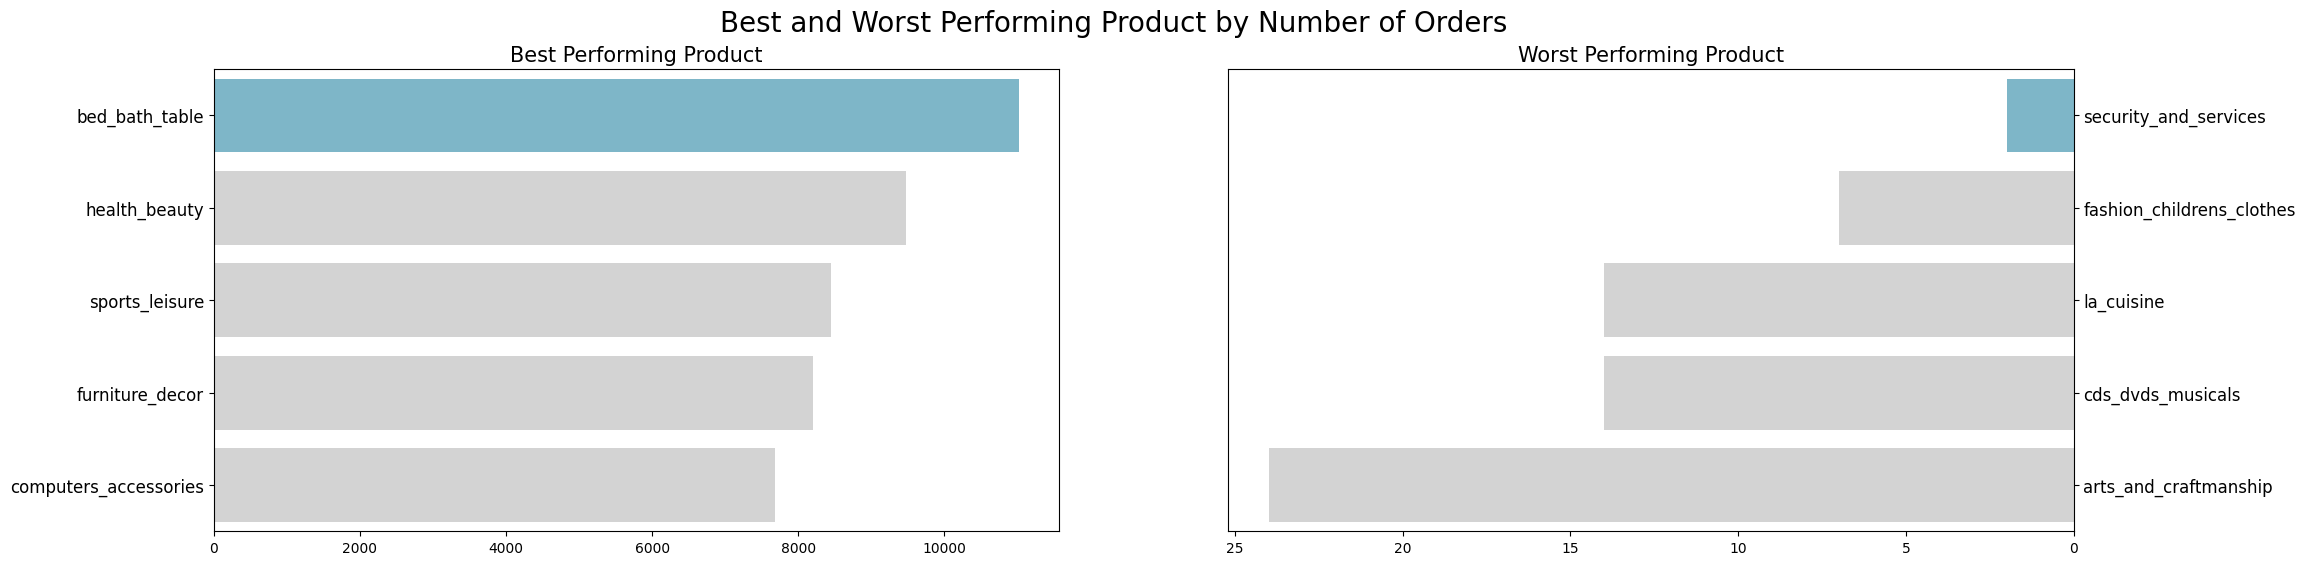

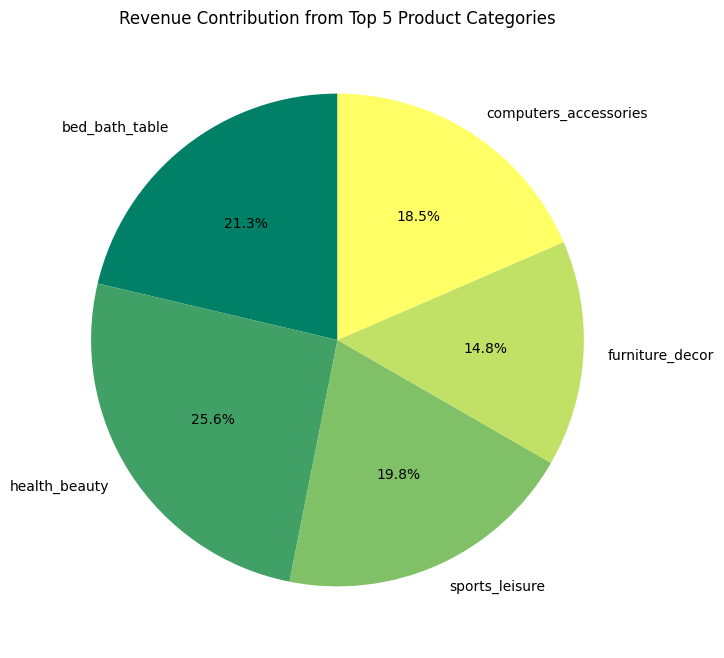

In [ ]:
product_summary = all_df.groupby('product_category_name_english').agg(
    total_orders=('order_id', 'count'),
    total_revenue=('price', 'sum')
).sort_values(by='total_orders', ascending=False)

top5_product_summary = product_summary.head(5)

# Bar Chart: Jumlah pesanan per kategori
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="total_orders", y="product_category_name_english", data=product_summary.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="total_orders", y="product_category_name_english", data=product_summary.sort_values(by="total_orders", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Orders", fontsize=20)
plt.show()

# Pie Chart: Kontribusi pendapatan per kategori
plt.figure(figsize=(8, 8))
top5_product_summary['total_revenue'].plot(kind='pie', autopct='%1.1f%%', colormap='summer', startangle=90)
plt.title("Revenue Contribution from Top 5 Product Categories")
plt.ylabel(None)
plt.show()

**Insight:**
- Semua produk yang memiliki penjualan tertinggi sudah terlihat dan produk yang paling banyak terjual adalah bed_bath_table, tetapi untuk produk yang memiliki kontribusi pendapatan adalah health_beauty

### Pertanyaan 2: Apakah kecepatan pengiriman berpengaruh terhadap skor review dari customer?

<ipython-input-90-0bd1dfe7dbc8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


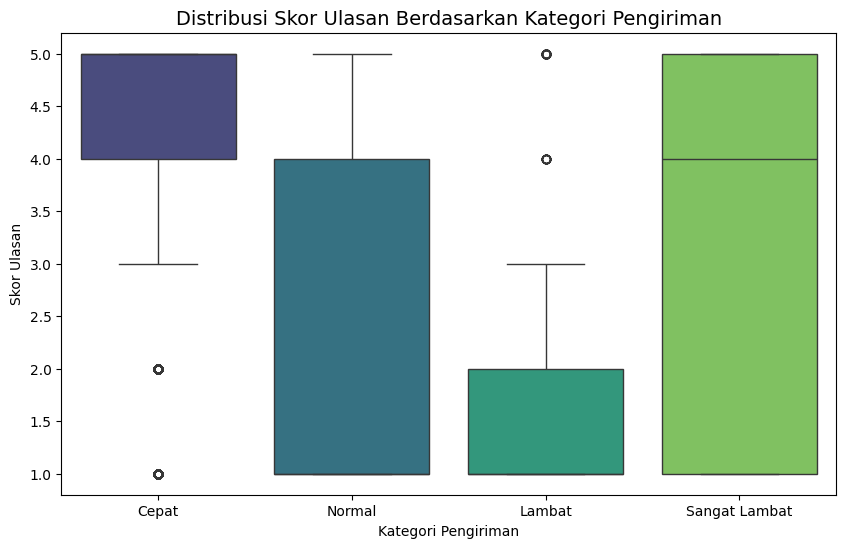

In [ ]:
max_delivery_speed = all_df['delivery_speed'].max()  # Nilai maksimum dari delivery_speed
bins = [0, 25, 50, 100, max_delivery_speed + 1]  # Tambahkan nilai maksimum + 1 ke bins
labels = ['Cepat', 'Normal', 'Lambat', 'Sangat Lambat']

# Box Plot: Skor ulasan berdasarkan kategori pengiriman
all_df['delivery_category'] = pd.cut(
    all_df['delivery_speed'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='delivery_category',
    y='review_score',
    data=all_df,
    palette='viridis'
)
plt.title("Distribusi Skor Ulasan Berdasarkan Kategori Pengiriman", fontsize=14)
plt.xlabel("Kategori Pengiriman")
plt.ylabel("Skor Ulasan")
plt.show()


**Insight:**
- Pada kategori cepat memiliki distribusi skor yang cukup baik yaitu di sekitar 4.0 - 5.0, tetapi ada beberapa data kecil yang berada pada skor yang rendah. Untuk kategori normal, distribusi skor cukup merata yaitu ada di sekitar 1.0 - 4.0 dengan median ada di sekitar 4.0, yang mana skor ini tentu lebih rendah dari kategori cepat. Pada kategori lambat, distribusi skor ada di sekitar 1.0 - 2.0 dengan median ada di sekitar 2.0 tetapi kebanyakan data berada di skor bawahnya walau ada beberapa data kecil yang berada pada skor tinggi, meskipun begitu skor pada kategori lambat ini lebih rendah dari kategori normal. Lalu untuk kategori sangat lambat, distribusi skornya sangat merata dari skor 1.0 sampai 5.0 dengan median sama seperti kategori normal yaitu ada di kisaran 4.0 tetapi untuk kategori sangat lambat ini memiliki data yang cukup banyak pada skor tinggi yang mana skor pada kategori lambat ini memiliki skor yang lebih tinggi daripada skor kategori normal

## Analisis Lanjutan (Opsional)

**RFM**

In [ ]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "customer": "first",
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "count", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "customer", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

customer_id  customer  frequency  monetary  recency
0  00012a2ce6f8dcda20d059ce98491703     84791          1     89.80      288
1  000161a058600d5901f007fab4c27140     27336          1     54.90      409
2  0001fd6190edaaf884bcaf3d49edf079     63793          1    179.99      547
3  0002414f95344307404f0ace7a26f1d5     97757          1    149.90      378
4  000379cdec625522490c315e70c7a9fb     59922          1     93.00      149

<ipython-input-92-8cbbb984ab26>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-92-8cbbb984ab26>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-92-8cbbb984ab26>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer", data=rfm_df.sort_values(by="monetary"

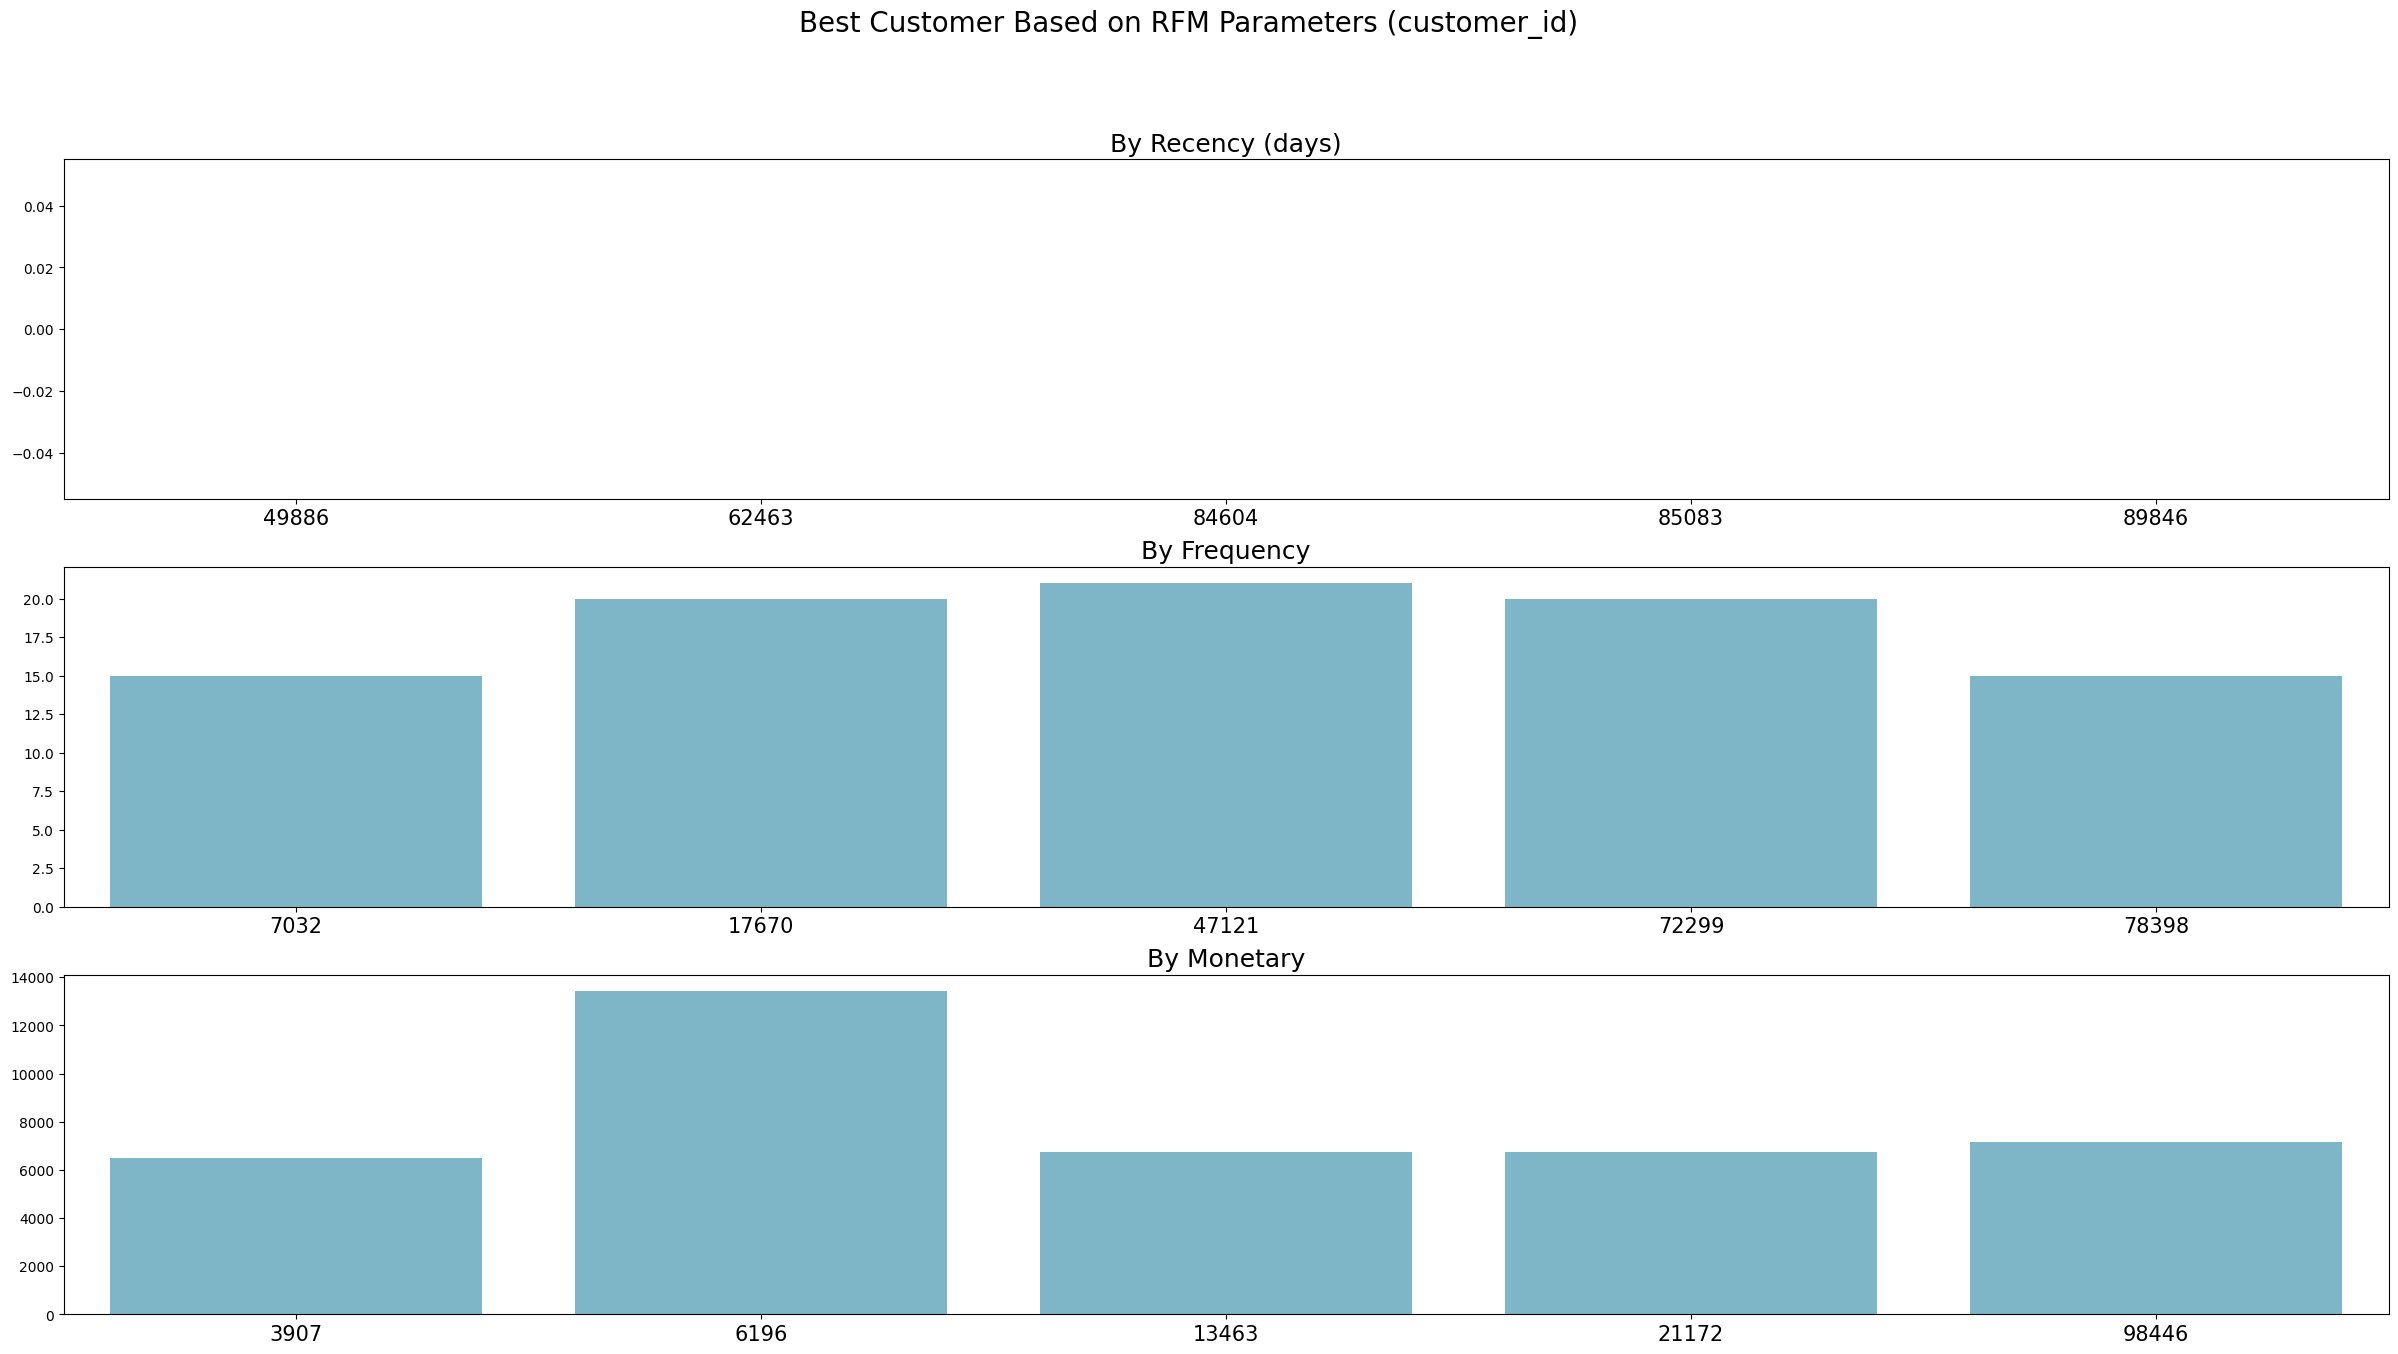

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30, 15))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**
-

**Geospatial Analysis**

In [ ]:
customer_loc_df = customer_loc_df.merge(all_df[['customer_id', 'seller_id', 'order_id', 'delivery_speed']], on='customer_id', how='left')
customer_loc_df.head()

customer_city                       customer_id        lat  \
0  abadia dos dourados  9e01f714a2b3b8962c222cf2b74c20dc -18.477752   
1            abadiania  576d71ddb21b21763cfedce73b902180 -16.193718   
2               abaete  08528824266cd0720658ff01df662b6a -19.158364   
3           abaetetuba  305f736d2711641a06f6a9c9bd837b00  -1.723644   
4              abaiara  9723d86b12bdec025be4c43f71b0ba52  -7.355970   

         lon  zip_code_prefix  customer                         seller_id  \
0 -47.406319            38540     74530  12b9676b00f60f3b700e83af21824c0e   
1 -48.709452            72940     42308  f9244d45189d3a3605499abddeade7d5   
2 -45.446897            35620     61141  7a67c85e85bb2ce8582c35f2203ad736   
3 -48.881349            68440     11201  530ec6109d11eaaf87999465c6afee01   
4 -39.043267            63240     69826  c003204e1ab016dfa150abc119207b24   

                           order_id  delivery_speed  
0  50ba38c4dc467baab1ea2c8c7747934d            17.0  
1  3f1294f87d79b57f5d55ba7b80c3d94f            21.0  
2  5525ea8ee9e6150faa9b41dfc4024552             8.0  
3  679783b320e587d8e1c9e0dcb2421539            18.0  
4  73ffc468078b5f3e2c4260065e5e5152            23.0

In [ ]:
customerNseller_loc_df = customer_loc_df.merge(sellers_loc_df, on='seller_id', how='left')
customerNseller_loc_df.head()

customer_city                       customer_id      lat_x  \
0  abadia dos dourados  9e01f714a2b3b8962c222cf2b74c20dc -18.477752   
1            abadiania  576d71ddb21b21763cfedce73b902180 -16.193718   
2               abaete  08528824266cd0720658ff01df662b6a -19.158364   
3           abaetetuba  305f736d2711641a06f6a9c9bd837b00  -1.723644   
4              abaiara  9723d86b12bdec025be4c43f71b0ba52  -7.355970   

       lon_x  zip_code_prefix_x  customer                         seller_id  \
0 -47.406319              38540     74530  12b9676b00f60f3b700e83af21824c0e   
1 -48.709452              72940     42308  f9244d45189d3a3605499abddeade7d5   
2 -45.446897              35620     61141  7a67c85e85bb2ce8582c35f2203ad736   
3 -48.881349              68440     11201  530ec6109d11eaaf87999465c6afee01   
4 -39.043267              63240     69826  c003204e1ab016dfa150abc119207b24   

                           order_id  delivery_speed seller_city      lat_y  \
0  50ba38c4dc467baab1ea2c8c7747934d            17.0  montenegro -29.688238   
1  3f1294f87d79b57f5d55ba7b80c3d94f            21.0         NaN        NaN   
2  5525ea8ee9e6150faa9b41dfc4024552             8.0         NaN        NaN   
3  679783b320e587d8e1c9e0dcb2421539            18.0         NaN        NaN   
4  73ffc468078b5f3e2c4260065e5e5152            23.0         NaN        NaN   

      lon_y  zip_code_prefix_y  seller  
0 -51.46873            95780.0  1025.0  
1       NaN                NaN     NaN  
2       NaN                NaN     NaN  
3       NaN                NaN     NaN  
4       NaN                NaN     NaN

In [ ]:
customerNseller_loc_df.dropna(axis=0, inplace=True)

In [ ]:
customerNseller_loc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698 entries, 0 to 4581
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_city      698 non-null    object 
 1   customer_id        698 non-null    object 
 2   lat_x              698 non-null    float64
 3   lon_x              698 non-null    float64
 4   zip_code_prefix_x  698 non-null    int64  
 5   customer           698 non-null    int64  
 6   seller_id          698 non-null    object 
 7   order_id           698 non-null    object 
 8   delivery_speed     698 non-null    float64
 9   seller_city        698 non-null    object 
 10  lat_y              698 non-null    float64
 11  lon_y              698 non-null    float64
 12  zip_code_prefix_y  698 non-null    float64
 13  seller             698 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 81.8+ KB


In [ ]:
customerNseller_loc_df['seller_location'] = customerNseller_loc_df.apply(lambda row: Point(row['lon_y'], row['lat_y']), axis=1)
customerNseller_loc_df['customer_location'] = customerNseller_loc_df.apply(lambda row: Point(row['lon_x'], row['lat_x']), axis=1)

# Konversi ke GeoDataFrame
gdf = gpd.GeoDataFrame(customerNseller_loc_df, geometry='seller_location', crs="EPSG:4326")
gdf['delivery_line'] = gdf.apply(lambda row: LineString([row['seller_location'], row['customer_location']]), axis=1)

m = folium.Map(location=[-34.6037, -58.3816], zoom_start=6)

# Tambahkan garis penghubung dan tampilkan kecepatan pengiriman
for _, row in gdf.iterrows():
    line = folium.PolyLine(
        locations=[
            [row['lat_y'], row['lon_y']],
            [row['lat_x'], row['lon_x']]
        ],
        color='blue' if row['delivery_speed'] <= 3 else 'red',  # Warna berdasarkan kecepatan pengiriman
        weight=3,
        tooltip=f"From: {row['seller_city']} To: {row['customer_city']} | Speed: {row['delivery_speed']} days"
    )
    line.add_to(m)

# Tambahkan marker untuk kota penjual dan pembeli
for _, row in gdf.iterrows():
    folium.Marker(
        location=[row['lat_y'], row['lon_y']],
        popup=f"Seller: {row['seller_city']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

    folium.Marker(
        location=[row['lat_x'], row['lon_x']],
        popup=f"Customer: {row['customer_city']}",
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(m)

m.save('delivery_speed_map.html')
m

**Clustering**

In [ ]:
cluster_df = all_df.groupby(by="seller", as_index=False).agg({
    "order_id": "count",
    "price": "sum"
})
cluster_df.columns = ["seller", "total_orders", "total_revenue"]

cluster_df.head()

seller  total_orders  total_revenue
0       1             3         218.70
1       2            40       11413.17
2       3             1         158.00
3       4             1          79.99
4       5             1         167.99

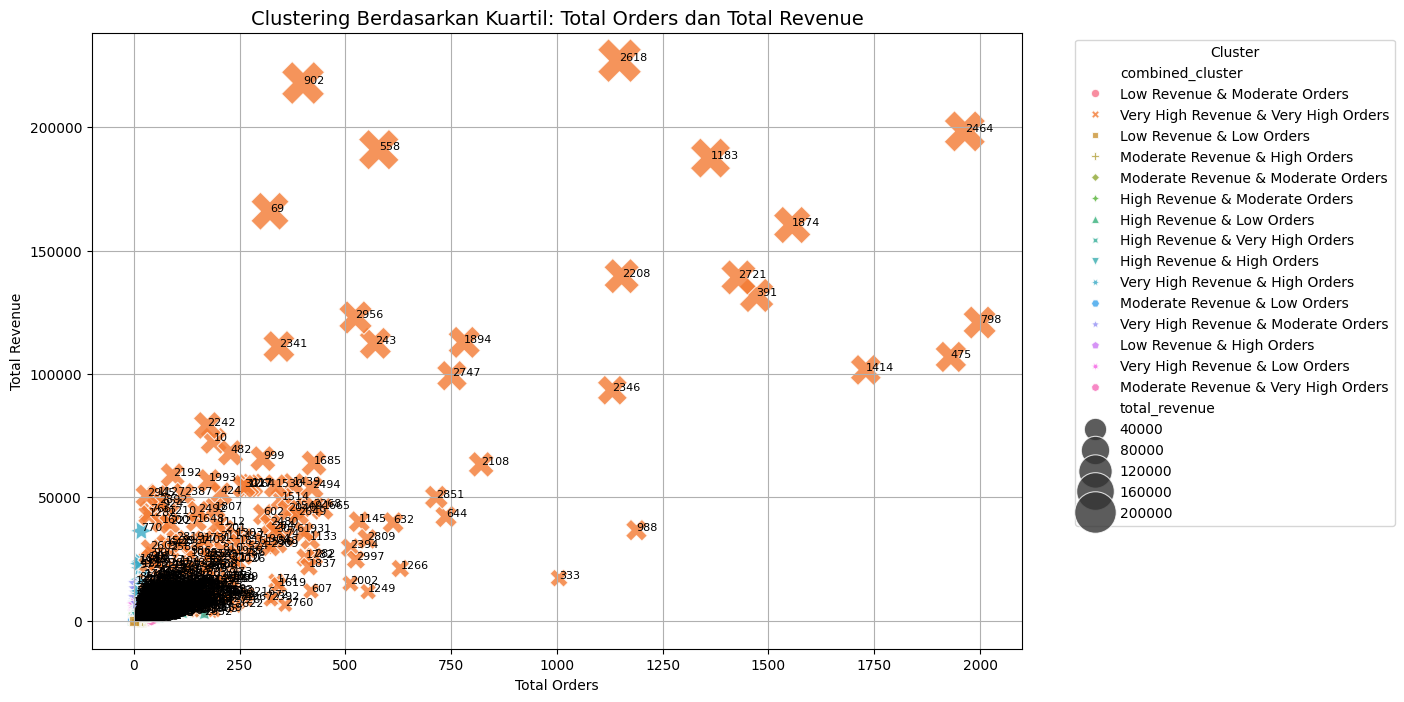

In [ ]:
# Hitung kuartil untuk total_orders dan total_revenue
q_orders = cluster_df['total_orders'].quantile([0.25, 0.5, 0.75]).to_dict()
q_revenue = cluster_df['total_revenue'].quantile([0.25, 0.5, 0.75]).to_dict()

# Fungsi clustering berdasarkan kuartil untuk total_revenue
def quartile_revenue_cluster(revenue):
    if revenue <= q_revenue[0.25]:
        return 'Low Revenue'
    elif q_revenue[0.25] < revenue <= q_revenue[0.5]:
        return 'Moderate Revenue'
    elif q_revenue[0.5] < revenue <= q_revenue[0.75]:
        return 'High Revenue'
    else:
        return 'Very High Revenue'

# Fungsi clustering berdasarkan kuartil untuk total_orders
def quartile_order_cluster(orders):
    if orders <= q_orders[0.25]:
        return 'Low Orders'
    elif q_orders[0.25] < orders <= q_orders[0.5]:
        return 'Moderate Orders'
    elif q_orders[0.5] < orders <= q_orders[0.75]:
        return 'High Orders'
    else:
        return 'Very High Orders'

# Menentukan cluster berdasarkan kuartil
cluster_df['revenue_cluster'] = cluster_df['total_revenue'].apply(quartile_revenue_cluster)
cluster_df['order_cluster'] = cluster_df['total_orders'].apply(quartile_order_cluster)

# Menggabungkan cluster kuartil
def combine_quartile_clusters(row):
    return f"{row['revenue_cluster']} & {row['order_cluster']}"

cluster_df['combined_cluster'] = cluster_df.apply(combine_quartile_clusters, axis=1)

# Visualisasi Bubble Chart
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='total_orders',
    y='total_revenue',
    size='total_revenue',  # Ukuran bubble berdasarkan total revenue
    hue='combined_cluster',  # Warna berdasarkan cluster gabungan
    data=cluster_df,
    style='combined_cluster',
    sizes=(100, 1000),  # Ukuran minimum dan maksimum bubble
    alpha=0.8
)

# Menambahkan label nama seller pada bubble
for i in range(cluster_df.shape[0]):
    plt.text(
        x=cluster_df['total_orders'].iloc[i],
        y=cluster_df['total_revenue'].iloc[i],
        s=cluster_df['seller'].iloc[i],  # Nama seller
        fontsize=8
    )

# Pengaturan plot
plt.title('Clustering Berdasarkan Kuartil: Total Orders dan Total Revenue', fontsize=14)
plt.xlabel('Total Orders')
plt.ylabel('Total Revenue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster')
plt.grid(True)
plt.show()


## Conclusion

- Conclution pertanyaan 1 -
Berdasarkan insight yang saya dapatkan, top 5 produk yang terjual paling banyak adalah bed_bath_table, health_beauty, sports_leisure, furniture_decor, dan yang ke 5 adalah computer_accessories, tetapi disini ada insight lain yang cukup menarik pada hubungan antara penjualan produk dan kontribusi produk dalam pendapatan, yang mana produk yang terjual paling banyak belum tentu memiliki kontribusi terbanyak pada pendapatan, karena pada penjualan produk paling banyak adalah produk bed_bath_table, sedangkan produk yang memilki kontribusi pendapatan terbanyak adalah health_beauty dan bed_bath_table ada di urutan ke2, yang mana ini menunjukkan bahwa produk yang paling laris tidak selalu menjadi produk yang berkontribusi pada pendapatan paling banyak, hal ini bisa disebabkan adanya faktor lain seperti harga, dan lain-lain
- Conclution pertanyaan 2 -
Berdasarkan insight yang saya dapatkan dari visualisasi boxplotnya, kecepatan pengiriman memang memengaruhi skor ulasan, tetapi sifatnya tidak absolut, karena bisa dilihat bahwa kategori sangat lambat memiliki skor yang lebih tinggi daripada skor pada kategori normal, ini bisa disebabkan oleh faktor lain seperti harga, pelayanan yang diberikan penjual, dan lain-lain

**Import Data**

In [ ]:
all_df.to_csv("all_data.csv", index=False)

In [ ]:
customerNseller_loc_df.to_csv("customer_seller_loc.csv", index=False)

**Rangkuman**

Gathering Data
*   Data Customer terdapat atribut city dan state yang mana itu dapat digunakan untuk mengetahui jumlah customer pada kota/negara tersebut
*   Data Geolocation dapat digunakan untuk membuat Geospatial Analysis dari kecepatan pengiriman dari kota ke kota lain
*   Data Order Items dapat digunakan untuk mengetahui performa seller dan performa produk
*   Data Order Payment dapat digunakan untuk mengetahui tipe pembayaran apa yang sering digunakan
*   Data Order Reviews dapat digunakan untuk mengetahui rata-rata skor dari masing-masing produk dan hubungan antara kecepatan pengiriman dengan skor yang diberikan
*   Data Orders dapat digunakan untuk mengetahui kecepatan pengiriman dan pengemasan
*   Data Product Category tidak ada yang spesial pada dataset ini, hanya berisi nama kategori produk
*   Data Products dapat digunakan untuk memperjelas analisis performa dari setiap produk
*   Data Sellers dapat digunakan untuk memperjelas analisis performa seller dan untuk kecepatan pengiriman dari kota seller ke kota customer










Assesing Data
*   Data Customer tidak ada masalah pada data apapun, hanya saya tambahkan atribut customer dengan isi angka yang di increment untuk mempermudah visualisasi pada customer nanti
*   Data Geolocation terdapat banyak sekali data duplikat, dikarenakan titik lokasi setiap wilayah banyak yang mirip
*   Data Order Items terdapat kesalahan tipe data pada atribut shipping_limit_date, yang mana seharusnya datetime tapi disini tipe object
*   Data Order Payment pada atribut payment_value, terdapat nilai minimum 0.00, sepertinya hal ini disebabkan oleh pembayaran yang tidak jadi
*   Data Order Reviews terdapat missing value pada atribut review_comment_title dan review_comment_message
*   Data Orders ada kesalahan tipe data pada atribut order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date yang seharusnya adalah datetime, dan terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Hal ini kemungkinan dikarenakan pesanan yang dilakukan, dibatalkan oleh pembeli
*   Data Product Category tidak ada masalah sama sekali pada dataset ini
*   Data Products terdapat missing value pada atribut identitas produknya, dan pada atribut product_weight_g, terdapat produk yang memiliki berat 0g
*   Data Sellers tidak ada masalah pada data ini, disini saya menambahkan atribut customer dengan isiangka yang di increment untuk mempermudah visualisasi pada seller nanti



Data Cleaning
*   Data Geolocation, masalah duplikat data berhasil diatasi walau jumlah duplikasinya cukup banyak
*   Data Order Items, tipe data sudah berhasil diubah ke datetime
*   Data Order Payment, payment_value 0.0 ini kemungkinan ini kemungkinan dikarenakan pembayaran yang tidak jadi dan hanya sedikit jumlahnya, jadi saya hapus saja untuk data yang memiliki payment_value 0.0
*   Data Orders, tipe data sudah berhasil diubah ke datetime. Untuk yang missing value, setelah saya analisa, sepertinya data-data missing value ini rata-rata adalah data pemesanan yang dibatalkan. Permasalahan missing value pada dataset orders berhasil diatasi dengan cara menghapus seluruh data missing value dikarenakan rata-rata data dari missing value ini tidak terlalu memiliki informasi penting untuk analisis nanti
*   Data Products, untuk missing valuenya saya ubah ke "empty" untuk atribut product_category_name, dan 0 untuk product_name_lenght, product_description_lenght, dan product_photos_qty



Exploratory Data Analysis (EDA)
*   Data Customer, disini saya melakukan eksplor pada jumlah customer pada masing2 city/state, dan hasilnya city/state yg memiliki customer terbanyak adalah sao paulo/SP
*   Data Geolocation, disini saya tidak melakukan eksplor apapun pada data ini, saya hanya mempersiapkan data untuk analisis geospatial nanti
*   Data Order Items, disini saya menggabungkannya dengan data product dan data seller, dan melakukan eksplor terhadap performa produk dan performa seller, dan hasilnya produk yang memiliki penjualan terbanyak adalah cama_mesa_banho, harga tertinggi adalah utilidades_domesticas, dan untuk seller yang memiliki penjualan terbanyak adalah seller ke-798, dan revenue terbanyak adalah seller ke-2618
*   Data Order Payment, disini saya melakukan eksplor pada pembayaran tertinggi, payment_type apa yang banyak digunakan dan customer rata-rata melakukan pembelian dengan berapa payment_installments, dan hasilnya pembayaran tertinggi adalah 13664.08, tipe pembayaran yang banyak digunakan adalah credit_card, dan kebanyakan customer melakukan pembayaran hanya sekali
*   Data Order Reviews, disini saya melakukan eksplor pada skor pembelian, dan hasilnya produk yang memiliki skor review tertinggi adalah cds dvd musicais tetapi memiliki total review yang sedikit yaitu 14 saja, untuk produk yang memiliki review terbanyak adalah cama mesa banho tetapi memiliki skor review yang tengah-tengah yaitu 3.9, mungkin dari penglihatan saya produk yang memiliki skor review tertinggi serta total review terbanyak adalah produk beleza saude dengan skor review 4.1 dengan total review 9645
*   Data Orders, ternyata setelah saya eksplor, terdapat masalah kemungkinan itu dikarenakan human eror atau system eror yang telat memasukkan tanggal pengiriman, tetapi hal itu sudah saya atasi dengan mengisi tanggal pengiriman yang bermasalah itu dengan tanggal pemesanan disetujui, ya kemungkinan bisa berbeda dari tanggal pengiriman yang "aslinya" tetapi mungkin tidak terlalu jauh jarak harinya, lalu disini saya sudah membuat kolom untuk melihat kecepatan pengiriman dari setiap pemesanan, dan menggabungkan data seller dan data customer sehingga saya bisa melihat rata-rata pengiriman antar kota itu berapa lama, dan setelah saya cek rata-rata pengiriman paling cepat adalah hanya beberapa jam saja tidak sampai 1 hari, dan rata-rata pengiriman paling lambat adalah 195 hari. Lalu saya juga sudah membuat untuk kolom keaktifan dari customer, dan bisa dilihat bahwa customer yang aktif jumlahnya ada 96461 dan yang tidak aktif ada 2980, yang mana bisa disimpulkan bahwa customer aktif memiliki jumlah lebih banyak daripada customer yang tidak aktif
*   Data all_df, disini saya menggabungkan data Order Items dan data Order Delivery yang mana ini adalah data hasil merge dari data Orders, Customer, Order Items, dan Seller yang berisi data-data penjualan, lalu saya menggabungkannya lagi dengan Data Order Reviews, dengan digabungkannya ini menjadi satu data, dapat menghasilkan data yang mencakup seluruh informasi pada data penjualan, disini sata melakukan eksplor untuk produk apa yang memiliki pendapatan tertinggi pada masing-masing negara, dan hasilnya adalah egara yang memiliki pembelian dengan total harga yang paling tinggi ada pada negara TO dengan benda yang terbeli dengan total harga yg tinggi adalah esporte lazer

